# Human mouse trajectory generation

In [3]:

#using this website reference: https://ben.land/post/2021/04/25/windmouse-human-mouse-movement/

import numpy as np
sqrt3 = np.sqrt(3)
sqrt5 = np.sqrt(5)

def wind_mouse(start_x, start_y, dest_x, dest_y, G_0=9, W_0=3, M_0=15, D_0=12, move_mouse=lambda x,y: None):
    '''
    WindMouse algorithm. Calls the move_mouse kwarg with each new step.
    Released under the terms of the GPLv3 license.
    G_0 - magnitude of the gravitational fornce
    W_0 - magnitude of the wind force fluctuations
    M_0 - maximum step size (velocity clip threshold)
    D_0 - distance where wind behavior changes from random to damped
    '''
    current_x,current_y = start_x,start_y
    v_x = v_y = W_x = W_y = 0
    while (dist:=np.hypot(dest_x-start_x,dest_y-start_y)) >= 1:
        W_mag = min(W_0, dist)
        if dist >= D_0:
            W_x = W_x/sqrt3 + (2*np.random.random()-1)*W_mag/sqrt5
            W_y = W_y/sqrt3 + (2*np.random.random()-1)*W_mag/sqrt5
        else:
            W_x /= sqrt3
            W_y /= sqrt3
            if M_0 < 3:
                M_0 = np.random.random()*3 + 3
            else:
                M_0 /= sqrt5
        v_x += W_x + G_0*(dest_x-start_x)/dist
        v_y += W_y + G_0*(dest_y-start_y)/dist
        v_mag = np.hypot(v_x, v_y)
        if v_mag > M_0:
            v_clip = M_0/2 + np.random.random()*M_0/2
            v_x = (v_x/v_mag) * v_clip
            v_y = (v_y/v_mag) * v_clip
        start_x += v_x
        start_y += v_y
        move_x = int(np.round(start_x))
        move_y = int(np.round(start_y))
        if current_x != move_x or current_y != move_y:
            #This should wait for the mouse polling interval
            move_mouse(current_x:=move_x,current_y:=move_y)
    return current_x,current_y

No handles with labels found to put in legend.


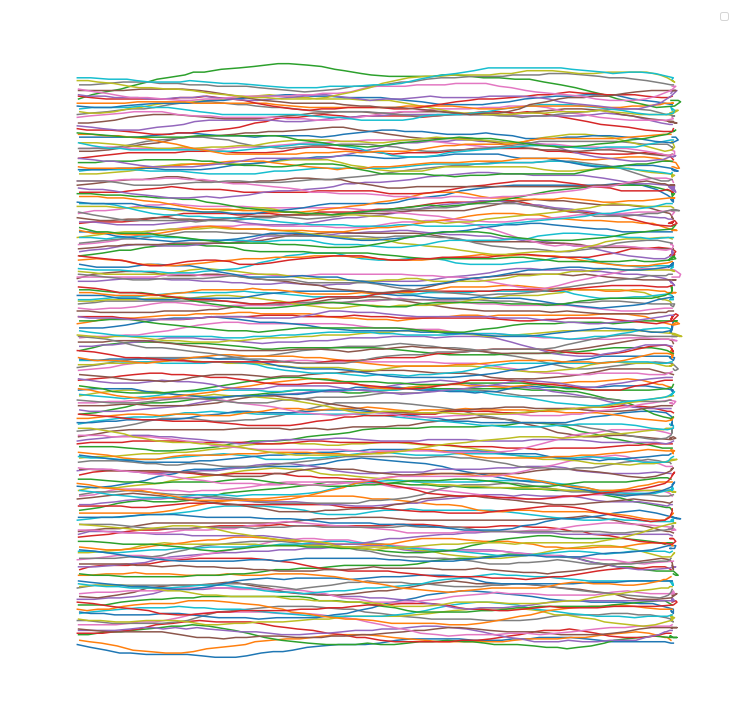

In [5]:
'''
Generate  human mouse movement coordinates
Fit a Chebyshev polynomial
write out coefficients to a csv file
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sqrt3 = np.sqrt(3)
sqrt5 = np.sqrt(5)


# Function to fit Chebyshev polynomial and plot the curve
def fit_chebyshev_and_get_coeffs(points, degree=5):
    x_coords, y_coords = points.T
    cheb_coeffs = np.polynomial.Chebyshev.fit(x_coords, y_coords, degree)
    return cheb_coeffs.convert().coef

fig = plt.figure(figsize=[13, 13])
plt.axis('off')

cheb_coeffs_list = []  # List to store Chebyshev coefficients

for y in np.linspace(-200, 200, 180):
    points = []
    wind_mouse(0, y, 500, y, move_mouse=lambda x, y: points.append([x, y]))
    points = np.asarray(points)
    plt.plot(*points.T)
    cheb_coeffs = fit_chebyshev_and_get_coeffs(points)
    cheb_coeffs_list.append(cheb_coeffs)

plt.xlim(-50, 550)
plt.ylim(-250, 250)
plt.legend()
plt.show()

# Create a DataFrame to store Chebyshev coefficients for each curve
coeffs_df = pd.DataFrame(cheb_coeffs_list, columns=[f'coeff_{i}' for i in range(len(cheb_coeffs_list[0]))])
coeffs_df['label'] = 'human'
#print(coeffs_df)

# Save the DataFrame to a CSV file
coeffs_df.to_csv('chebyshev_coefficients.csv', index=False)

# Bots mouse trajectory generation

180
Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075

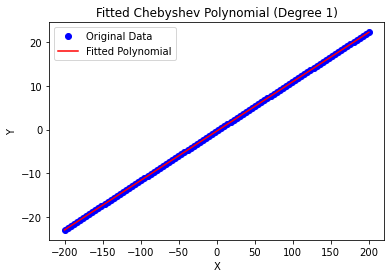

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

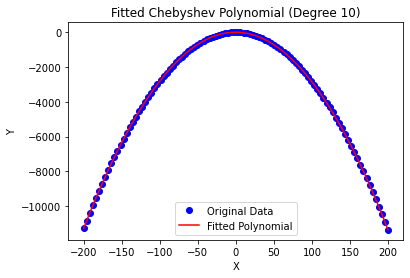

Coordinate Set:
X values: (-89.53683969972985, -89.47842723849145, -89.42001477725304, -89.36160231601463, -89.30318985477622, -89.24477739353782, -89.18636493229941, -89.12795247106101, -89.06954000982259, -89.01112754858418, -88.95271508734578, -88.89430262610738, -88.83589016486897, -88.77747770363055, -88.71906524239215, -88.66065278115374, -88.60224031991534, -88.54382785867693, -88.48541539743852, -88.42700293620011, -88.3685904749617, -88.3101780137233, -88.2517655524849, -88.19335309124648, -88.13494063000807, -88.07652816876967, -88.01811570753127, -87.95970324629286, -87.90129078505444, -87.84287832381604, -87.78446586257763, -87.72605340133923, -87.66764094010082, -87.6092284788624, -87.550816017624, -87.4924035563856, -87.43399109514719, -87.37557863390879, -87.31716617267037, -87.25875371143196, -87.20034125019356, -87.14192878895516, -87.08351632771675, -87.02510386647833, -86.96669140523993, -86.90827894400152, -86.84986648276312, -86.79145402152471, -86.7330415602863, -

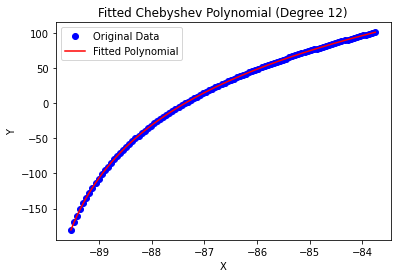

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

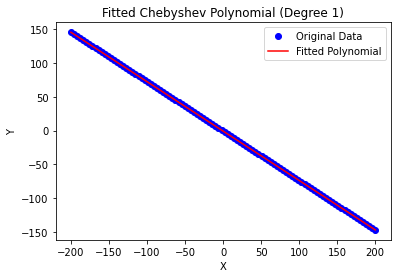

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

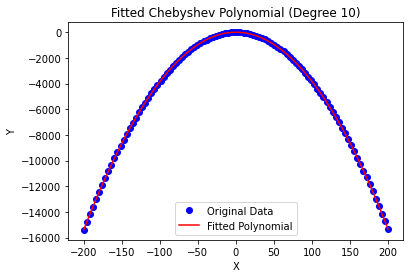

Coordinate Set:
X values: (-146.284338363242, -143.6723448297975, -141.06035129635305, -138.44835776290856, -135.8363642294641, -133.2243706960196, -130.61237716257514, -128.00038362913065, -125.38839009568619, -122.7763965622417, -120.16440302879724, -117.55240949535275, -114.94041596190827, -112.3284224284638, -109.71642889501932, -107.10443536157484, -104.49244182813037, -101.88044829468589, -99.26845476124141, -96.65646122779694, -94.04446769435246, -91.43247416090799, -88.8204806274635, -86.20848709401903, -83.59649356057454, -80.98450002713007, -78.37250649368559, -75.76051296024112, -73.14851942679664, -70.53652589335216, -67.92453235990769, -65.31253882646321, -62.700545293018735, -60.08855175957426, -57.47655822612978, -54.864564692685306, -52.25257115924083, -49.640577625796354, -47.02858409235188, -44.4165905589074, -41.804597025462925, -39.192603492018435, -36.58060995857396, -33.96861642512948, -31.356622891685006, -28.74462935824053, -26.132635824796054, -23.5206422913515

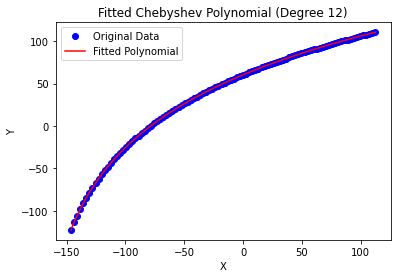

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

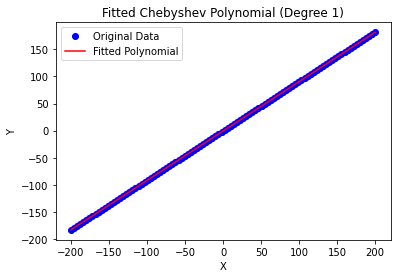

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

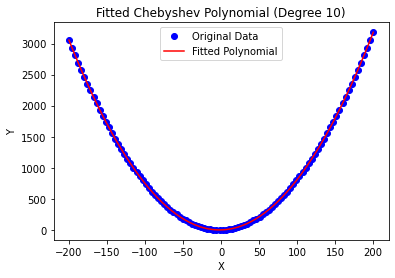

Coordinate Set:
X values: (-86.72570191955859, -85.65799350919724, -84.59028509883588, -83.52257668847453, -82.45486827811317, -81.38715986775182, -80.31945145739047, -79.25174304702911, -78.18403463666776, -77.1163262263064, -76.04861781594505, -74.98090940558369, -73.91320099522234, -72.84549258486098, -71.77778417449963, -70.71007576413828, -69.64236735377692, -68.57465894341557, -67.50695053305421, -66.43924212269286, -65.37153371233151, -64.30382530197015, -63.2361168916088, -62.16840848124744, -61.10070007088609, -60.032991660524736, -58.96528325016338, -57.897574839802026, -56.82986642944067, -55.76215801907932, -54.69444960871797, -53.62674119835661, -52.55903278799526, -51.4913243776339, -50.423615967272546, -49.35590755691119, -48.28819914654984, -47.22049073618849, -46.15278232582713, -45.08507391546578, -44.01736550510442, -42.94965709474307, -41.88194868438172, -40.814240274020364, -39.74653186365901, -38.67882345329765, -37.6111150429363, -36.54340663257494, -35.475698222

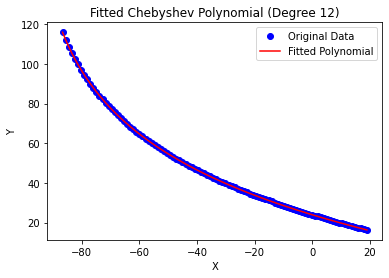

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

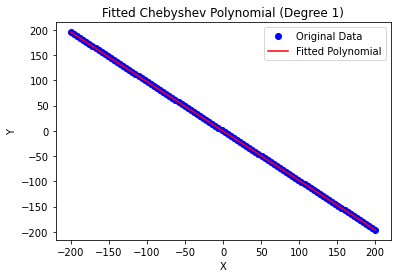

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

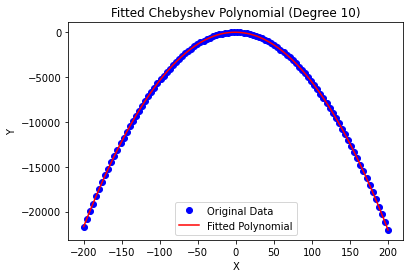

Coordinate Set:
X values: (-76.80934323766935, -76.9618710313765, -77.11439882508365, -77.2669266187908, -77.41945441249796, -77.5719822062051, -77.72450999991226, -77.87703779361941, -78.02956558732656, -78.18209338103371, -78.33462117474086, -78.48714896844801, -78.63967676215516, -78.79220455586231, -78.94473234956946, -79.09726014327661, -79.24978793698376, -79.40231573069092, -79.55484352439807, -79.70737131810522, -79.85989911181237, -80.01242690551952, -80.16495469922667, -80.31748249293382, -80.47001028664097, -80.62253808034812, -80.77506587405527, -80.92759366776242, -81.08012146146957, -81.23264925517672, -81.38517704888388, -81.53770484259103, -81.69023263629818, -81.84276043000533, -81.99528822371248, -82.14781601741963, -82.30034381112678, -82.45287160483393, -82.60539939854108, -82.75792719224823, -82.91045498595538, -83.06298277966253, -83.21551057336968, -83.36803836707684, -83.52056616078399, -83.67309395449114, -83.82562174819829, -83.97814954190544, -84.130677335612

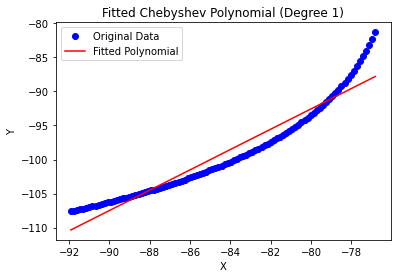

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

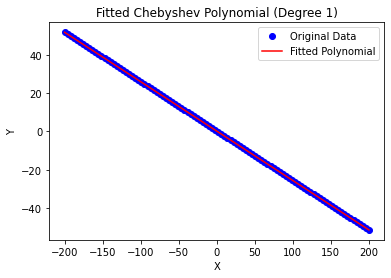

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

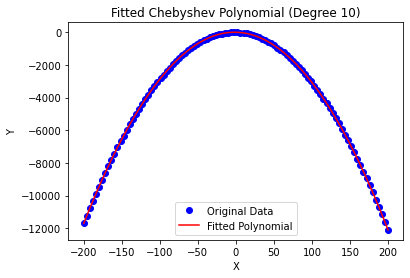

Coordinate Set:
X values: (-7.811932933738973, -8.614391655650865, -9.416850377562755, -10.219309099474646, -11.021767821386536, -11.824226543298428, -12.62668526521032, -13.42914398712221, -14.2316027090341, -15.034061430945991, -15.836520152857883, -16.638978874769773, -17.441437596681666, -18.243896318593556, -19.046355040505446, -19.848813762417336, -20.651272484329226, -21.45373120624112, -22.25618992815301, -23.058648650064903, -23.861107371976793, -24.663566093888683, -25.466024815800573, -26.268483537712463, -27.070942259624356, -27.873400981536246, -28.675859703448136, -29.47831842536003, -30.28077714727192, -31.08323586918381, -31.8856945910957, -32.68815331300759, -33.49061203491948, -34.29307075683137, -35.095529478743266, -35.897988200655156, -36.700446922567046, -37.502905644478936, -38.30536436639083, -39.10782308830272, -39.91028181021461, -40.7127405321265, -41.51519925403839, -42.31765797595028, -43.12011669786217, -43.92257541977406, -44.72503414168595, -45.527492863

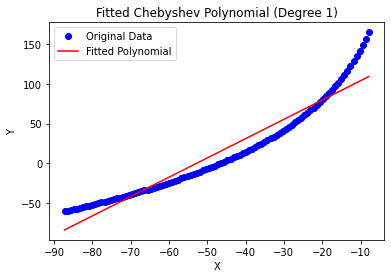

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

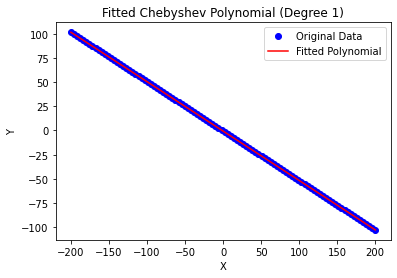

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

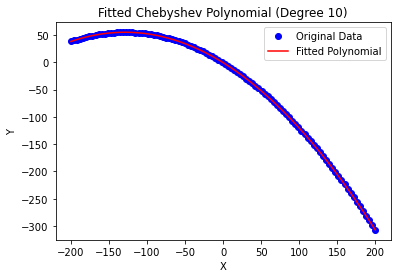

Coordinate Set:
X values: (-48.13781941647187, -46.148918243756206, -44.16001707104054, -42.17111589832487, -40.18221472560921, -38.19331355289354, -36.20441238017788, -34.215511207462214, -32.22661003474654, -30.23770886203088, -28.248807689315214, -26.259906516599546, -24.271005343883882, -22.282104171168214, -20.29320299845255, -18.304301825736882, -16.315400653021218, -14.32649948030555, -12.337598307589886, -10.348697134874222, -8.359795962158557, -6.370894789442886, -4.381993616727222, -2.3930924440115575, -0.4041912712958933, 1.584709901419771, 3.5736110741354423, 5.562512246851107, 7.551413419566771, 9.540314592282435, 11.529215764998106, 13.51811693771377, 15.507018110429435, 17.4959192831451, 19.48482045586077, 21.473721628576428, 23.4626228012921, 25.45152397400777, 27.440425146723427, 29.4293263194391, 31.418227492154756, 33.40712866487043, 35.3960298375861, 37.384931010301756, 39.37383218301743, 41.362733355733084, 43.351634528448756, 45.34053570116443, 47.329436873880084,

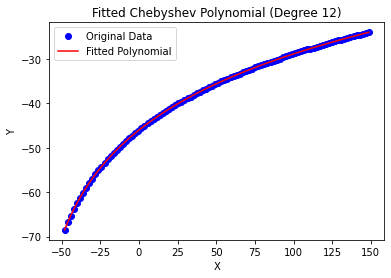

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

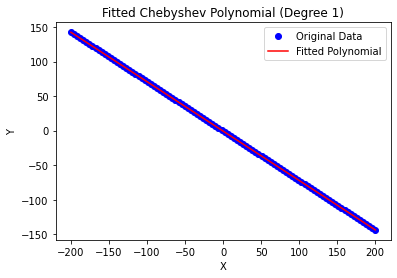

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

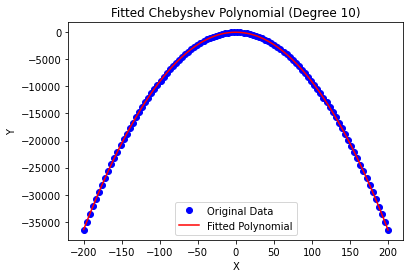

Coordinate Set:
X values: (146.4116371788565, 145.33155908443848, 144.25148099002044, 143.17140289560243, 142.0913248011844, 141.0112467067664, 139.93116861234836, 138.85109051793034, 137.77101242351233, 136.69093432909432, 135.61085623467628, 134.53077814025826, 133.45070004584025, 132.3706219514222, 131.2905438570042, 130.21046576258618, 129.13038766816817, 128.05030957375013, 126.97023147933211, 125.89015338491409, 124.81007529049607, 123.72999719607805, 122.64991910166003, 121.569841007242, 120.48976291282398, 119.40968481840596, 118.32960672398795, 117.24952862956992, 116.1694505351519, 115.08937244073388, 114.00929434631585, 112.92921625189783, 111.84913815747981, 110.7690600630618, 109.68898196864377, 108.60890387422575, 107.52882577980773, 106.4487476853897, 105.36866959097168, 104.28859149655366, 103.20851340213565, 102.12843530771762, 101.0483572132996, 99.96827911888158, 98.88820102446356, 97.80812293004553, 96.72804483562751, 95.6479667412095, 94.56788864679147, 93.48781055

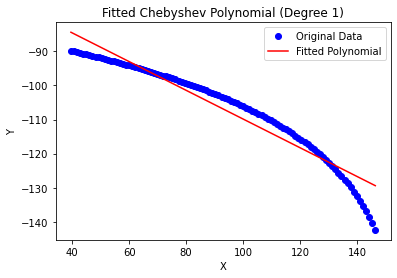

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

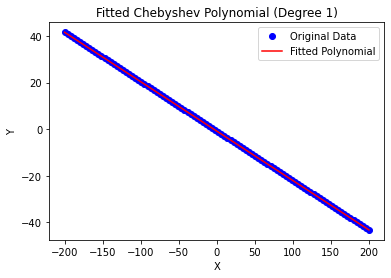

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

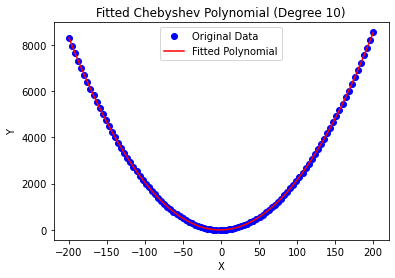

Coordinate Set:
X values: (-27.120129684400496, -27.26918893587205, -27.41824818734361, -27.567307438815167, -27.716366690286726, -27.865425941758282, -28.014485193229838, -28.163544444701397, -28.312603696172953, -28.461662947644513, -28.61072219911607, -28.759781450587624, -28.908840702059184, -29.05789995353074, -29.2069592050023, -29.356018456473855, -29.50507770794541, -29.65413695941697, -29.803196210888526, -29.952255462360085, -30.10131471383164, -30.250373965303197, -30.399433216774757, -30.548492468246312, -30.697551719717872, -30.846610971189428, -30.995670222660983, -31.144729474132543, -31.293788725604102, -31.442847977075658, -31.591907228547214, -31.74096648001877, -31.89002573149033, -32.03908498296189, -32.188144234433445, -32.337203485905, -32.486262737376556, -32.63532198884812, -32.784381240319675, -32.93344049179123, -33.08249974326279, -33.23155899473434, -33.3806182462059, -33.52967749767746, -33.67873674914902, -33.82779600062057, -33.97685525209213, -34.1259145

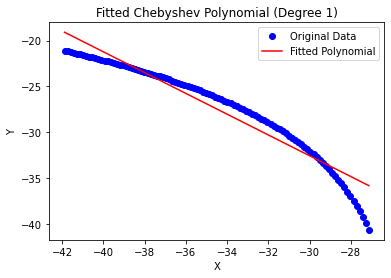

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

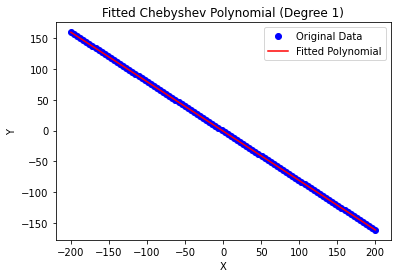

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

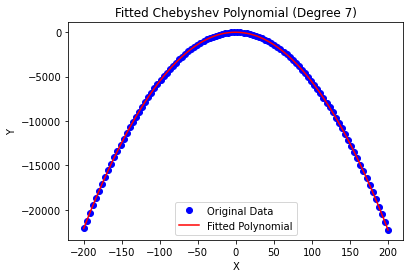

Coordinate Set:
X values: (-93.78055546886466, -91.8259288922558, -89.87130231564694, -87.91667573903808, -85.96204916242921, -84.00742258582035, -82.05279600921149, -80.09816943260263, -78.14354285599377, -76.18891627938491, -74.23428970277604, -72.27966312616718, -70.32503654955832, -68.37040997294946, -66.4157833963406, -64.46115681973174, -62.50653024312288, -60.551903666514015, -58.597277089905155, -56.642650513296296, -54.68802393668743, -52.73339736007857, -50.77877078346971, -48.82414420686085, -46.869517630251984, -44.914891053643125, -42.960264477034265, -41.0056379004254, -39.05101132381654, -37.09638474720768, -35.14175817059882, -33.18713159398995, -31.232505017381094, -29.277878440772227, -27.323251864163367, -25.368625287554508, -23.41399871094565, -21.45937213433679, -19.50474555772793, -17.55011898111907, -15.595492404510196, -13.640865827901337, -11.686239251292477, -9.731612674683618, -7.776986098074758, -5.8223595214658985, -3.867732944857039, -1.9131063682481653, 0

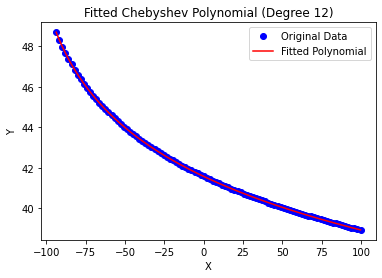

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

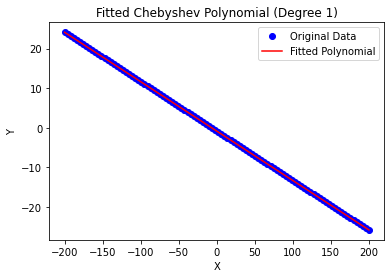

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

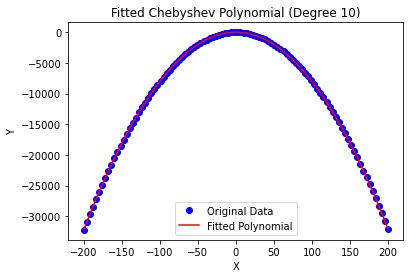

Coordinate Set:
X values: (2.8281629778456647, 1.557447326384266, 0.28673167492286744, -0.9839839765385312, -2.25469962799993, -3.5254152794613285, -4.796130930922727, -6.066846582384127, -7.337562233845524, -8.608277885306922, -9.878993536768322, -11.149709188229721, -12.420424839691119, -13.691140491152517, -14.961856142613918, -16.232571794075316, -17.503287445536714, -18.77400309699811, -20.04471874845951, -21.31543439992091, -22.586150051382308, -23.856865702843706, -25.127581354305107, -26.398297005766505, -27.669012657227903, -28.9397283086893, -30.210443960150698, -31.4811596116121, -32.7518752630735, -34.022590914534895, -35.293306565996296, -36.56402221745769, -37.83473786891909, -39.10545352038049, -40.37616917184189, -41.64688482330329, -42.91760047476468, -44.188316126226084, -45.459031777687485, -46.72974742914888, -48.00046308061028, -49.27117873207168, -50.54189438353308, -51.81261003499448, -53.08332568645588, -54.35404133791727, -55.624756989378675, -56.89547264084007

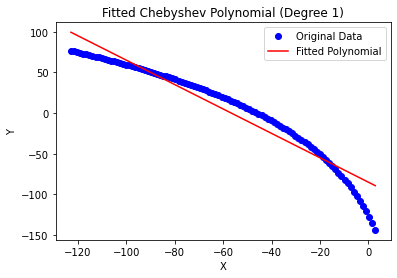

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

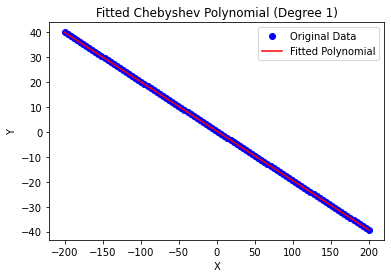

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

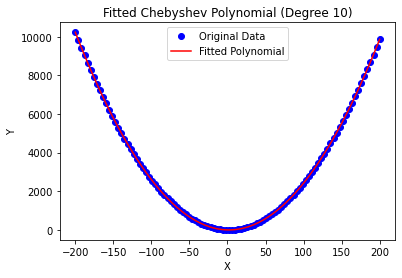

Coordinate Set:
X values: (48.89885971076899, 46.77970076657017, 44.66054182237136, 42.54138287817254, 40.42222393397373, 38.30306498977492, 36.1839060455761, 34.064747101377286, 31.945588157178474, 29.826429212979658, 27.707270268780846, 25.58811132458203, 23.468952380383215, 21.349793436184402, 19.230634491985587, 17.111475547786775, 14.992316603587959, 12.873157659389143, 10.753998715190328, 8.634839770991519, 6.515680826792703, 4.396521882593888, 2.277362938395072, 0.1582039941962563, -1.9609549500025594, -4.080113894201368, -6.199272838400184, -8.318431782599, -10.437590726797815, -12.55674967099663, -14.67590861519544, -16.795067559394255, -18.91422650359307, -21.033385447791886, -23.152544391990702, -25.271703336189518, -27.390862280388333, -29.51002122458715, -31.62918016878595, -33.748339112984766, -35.86749805718358, -37.9866570013824, -40.10581594558121, -42.22497488978003, -44.344133833978844, -46.46329277817766, -48.582451722376476, -50.70161066657529, -52.82076961077411, 

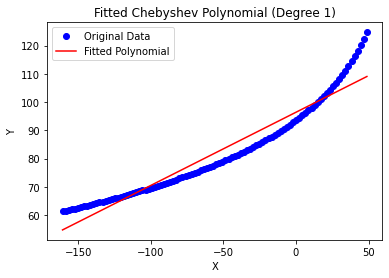

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

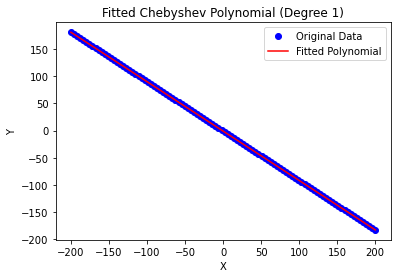

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

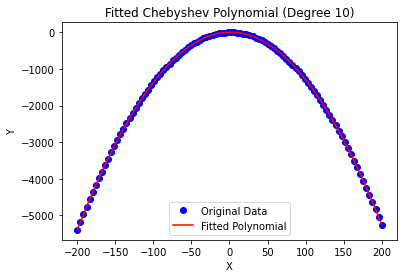

Coordinate Set:
X values: (-38.21466032647348, -37.301730243314736, -36.38880016015599, -35.475870076997246, -34.5629399938385, -33.650009910679756, -32.737079827521015, -31.824149744362266, -30.911219661203525, -29.99828957804478, -29.085359494886035, -28.172429411727293, -27.259499328568545, -26.346569245409803, -25.43363916225106, -24.520709079092313, -23.60777899593357, -22.694848912774823, -21.78191882961608, -20.868988746457337, -19.95605866329859, -19.04312858013985, -18.130198496981105, -17.21726841382236, -16.304338330663615, -15.39140824750487, -14.478478164346129, -13.565548081187384, -12.652617998028639, -11.739687914869894, -10.826757831711152, -9.913827748552407, -9.000897665393662, -8.087967582234917, -7.175037499076172, -6.262107415917431, -5.349177332758686, -4.436247249599944, -3.5233171664411955, -2.610387083282454, -1.6974570001237055, -0.784526916964964, 0.12840316619377745, 1.041333249352526, 1.9542633325112675, 2.867193415670016, 3.7801234988287575, 4.69305358198

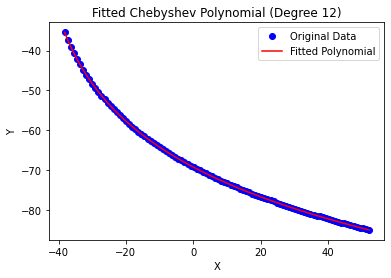

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

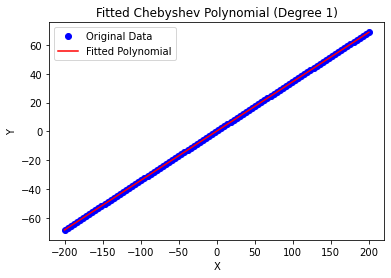

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

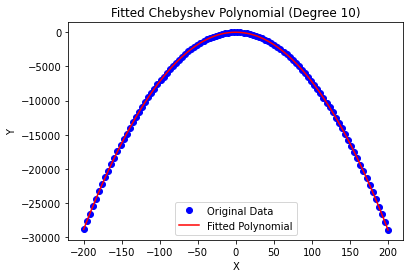

Coordinate Set:
X values: (173.32255907025467, 173.4655485601925, 173.6085380501303, 173.75152754006814, 173.89451703000597, 174.03750651994378, 174.1804960098816, 174.32348549981944, 174.46647498975724, 174.60946447969508, 174.7524539696329, 174.89544345957074, 175.03843294950855, 175.18142243944638, 175.3244119293842, 175.46740141932202, 175.61039090925985, 175.75338039919768, 175.89636988913549, 176.03935937907332, 176.18234886901115, 176.32533835894895, 176.4683278488868, 176.61131733882462, 176.75430682876242, 176.89729631870026, 177.0402858086381, 177.18327529857592, 177.32626478851373, 177.46925427845156, 177.6122437683894, 177.7552332583272, 177.89822274826503, 178.04121223820286, 178.18420172814066, 178.3271912180785, 178.47018070801633, 178.61317019795413, 178.75615968789197, 178.8991491778298, 179.0421386677676, 179.18512815770544, 179.32811764764327, 179.4711071375811, 179.6140966275189, 179.75708611745674, 179.90007560739457, 180.04306509733237, 180.1860545872702, 180.3290

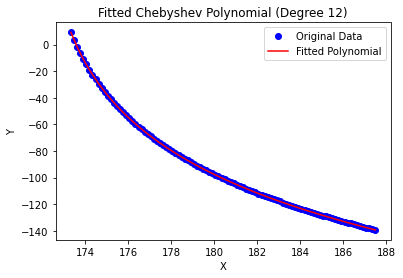

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

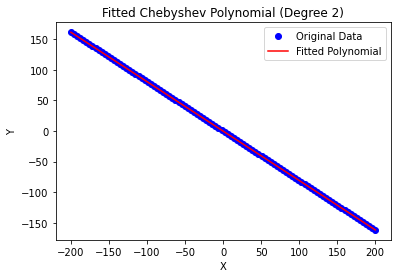

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

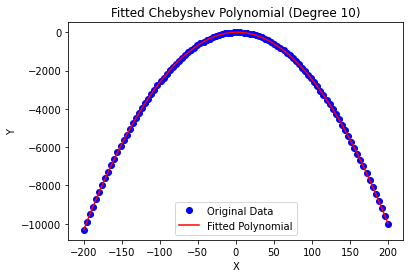

Coordinate Set:
X values: (-103.54703286837884, -102.34955839297349, -101.15208391756813, -99.95460944216279, -98.75713496675743, -97.55966049135209, -96.36218601594675, -95.16471154054139, -93.96723706513605, -92.7697625897307, -91.57228811432535, -90.37481363892, -89.17733916351466, -87.9798646881093, -86.78239021270396, -85.58491573729862, -84.38744126189326, -83.1899667864879, -81.99249231108256, -80.79501783567721, -79.59754336027186, -78.40006888486651, -77.20259440946117, -76.00511993405581, -74.80764545865047, -73.61017098324513, -72.41269650783977, -71.21522203243443, -70.01774755702908, -68.82027308162372, -67.62279860621838, -66.42532413081304, -65.22784965540768, -64.03037518000232, -62.83290070459698, -61.63542622919164, -60.43795175378629, -59.240477278380936, -58.04300280297559, -56.84552832757024, -55.64805385216489, -54.45057937675954, -53.25310490135419, -52.05563042594885, -50.8581559505435, -49.66068147513815, -48.463206999732805, -47.265732524327454, -46.0682580489

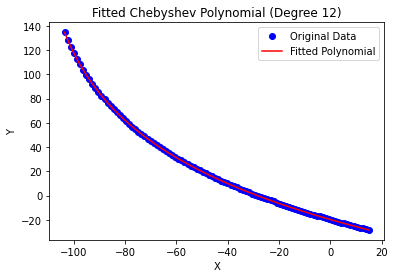

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

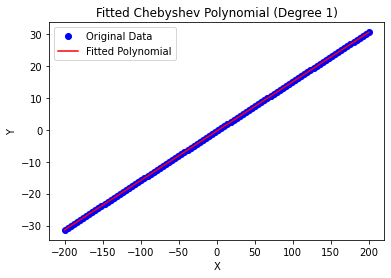

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

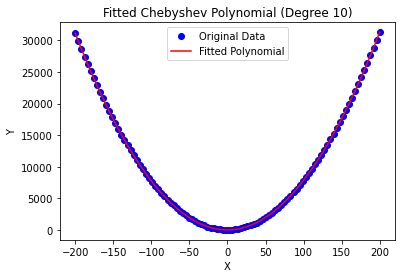

Coordinate Set:
X values: (40.73182662174452, 38.55139608649297, 36.37096555124143, 34.19053501598989, 32.01010448073834, 29.8296739454868, 27.649243410235258, 25.468812874983712, 23.28838233973217, 21.107951804480628, 18.927521269229082, 16.74709073397754, 14.566660198725998, 12.386229663474452, 10.20579912822291, 8.025368592971368, 5.844938057719823, 3.664507522468277, 1.4840769872167385, -0.6963535480348071, -2.8767840832863527, -5.057214618537891, -7.237645153789437, -9.418075689040982, -11.598506224292521, -13.778936759544067, -15.959367294795612, -18.139797830047158, -20.320228365298696, -22.500658900550242, -24.68108943580178, -26.861519971053326, -29.04195050630487, -31.222381041556417, -33.40281157680796, -35.58324211205951, -37.76367264731104, -39.944103182562586, -42.12453371781413, -44.30496425306568, -46.48539478831722, -48.66582532356877, -50.8462558588203, -53.026686394071845, -55.20711692932339, -57.387547464574936, -59.56797799982648, -61.74840853507803, -63.9288390703

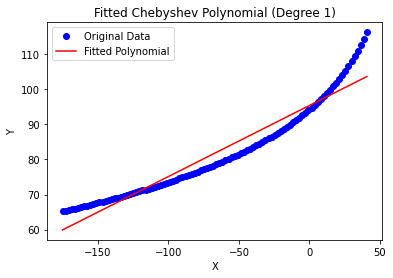

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

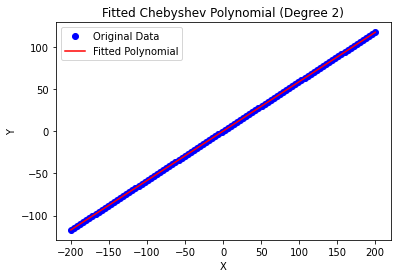

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

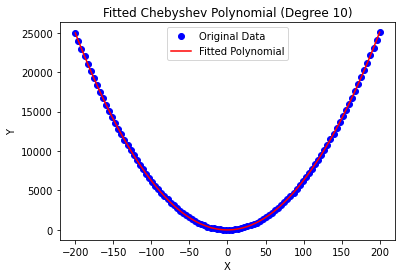

Coordinate Set:
X values: (-150.54968972030855, -147.59878160523544, -144.64787349016234, -141.69696537508926, -138.74605726001616, -135.79514914494305, -132.84424102986995, -129.89333291479684, -126.94242479972375, -123.99151668465066, -121.04060856957756, -118.08970045450445, -115.13879233943135, -112.18788422435826, -109.23697610928515, -106.28606799421206, -103.33515987913896, -100.38425176406585, -97.43334364899276, -94.48243553391966, -91.53152741884657, -88.58061930377346, -85.62971118870036, -82.67880307362726, -79.72789495855416, -76.77698684348105, -73.82607872840796, -70.87517061333486, -67.92426249826175, -64.97335438318866, -62.02244626811556, -59.07153815304247, -56.12063003796936, -53.16972192289626, -50.21881380782317, -47.26790569275006, -44.31699757767697, -41.36608946260387, -38.41518134753076, -35.46427323245767, -32.513365117384566, -29.56245700231146, -26.61154888723837, -23.660640772165266, -20.70973265709216, -17.758824542019056, -14.80791642694598, -11.85700831

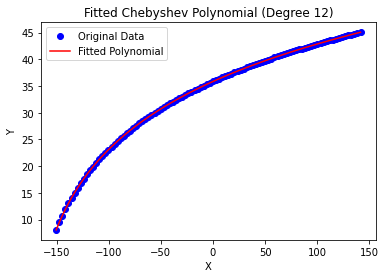

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

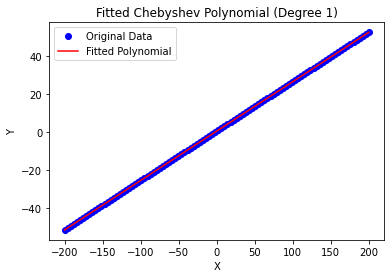

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

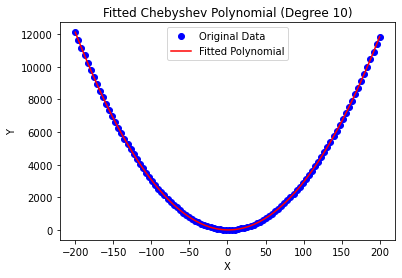

Coordinate Set:
X values: (-110.05590474820188, -108.28644332655972, -106.51698190491757, -104.74752048327541, -102.97805906163326, -101.2085976399911, -99.43913621834895, -97.66967479670679, -95.90021337506464, -94.13075195342248, -92.36129053178033, -90.59182911013816, -88.822367688496, -87.05290626685385, -85.28344484521169, -83.51398342356954, -81.74452200192738, -79.97506058028523, -78.20559915864307, -76.4361377370009, -74.66667631535876, -72.89721489371661, -71.12775347207445, -69.35829205043228, -67.58883062879013, -65.81936920714799, -64.04990778550582, -62.28044636386366, -60.510984942221505, -58.74152352057935, -56.972062098937194, -55.20260067729504, -53.43313925565288, -51.66367783401073, -49.89421641236857, -48.124754990726416, -46.35529356908426, -44.585832147442105, -42.81637072579994, -41.04690930415779, -39.27744788251563, -37.50798646087348, -35.73852503923132, -33.96906361758916, -32.19960219594701, -30.430140774304846, -28.660679352662697, -26.891217931020535, -25.

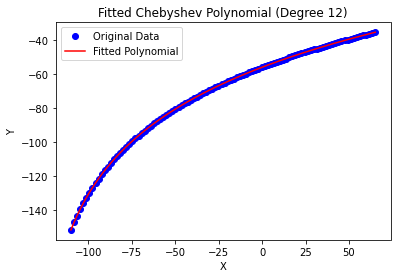

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

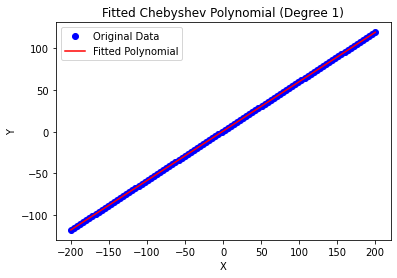

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

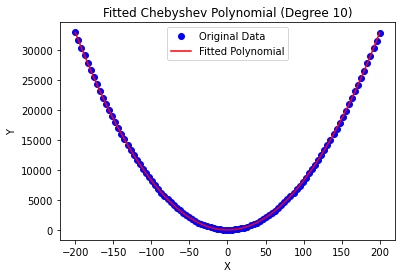

Coordinate Set:
X values: (131.81506375600958, 131.70371230485313, 131.59236085369668, 131.4810094025402, 131.36965795138374, 131.2583065002273, 131.14695504907084, 131.03560359791436, 130.9242521467579, 130.81290069560146, 130.701549244445, 130.59019779328852, 130.47884634213207, 130.36749489097562, 130.25614343981917, 130.1447919886627, 130.03344053750624, 129.92208908634979, 129.81073763519333, 129.69938618403685, 129.5880347328804, 129.47668328172395, 129.3653318305675, 129.25398037941102, 129.14262892825457, 129.03127747709812, 128.91992602594166, 128.80857457478518, 128.69722312362873, 128.58587167247228, 128.47452022131583, 128.36316877015935, 128.2518173190029, 128.14046586784644, 128.02911441669, 127.91776296553353, 127.80641151437707, 127.69506006322061, 127.58370861206416, 127.47235716090769, 127.36100570975124, 127.24965425859477, 127.13830280743832, 127.02695135628186, 126.9155999051254, 126.80424845396894, 126.69289700281249, 126.58154555165602, 126.47019410049957, 126.35

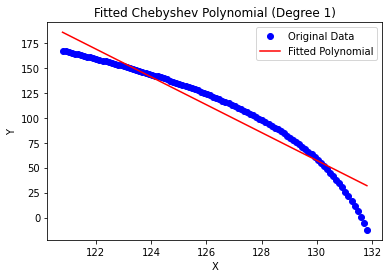

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

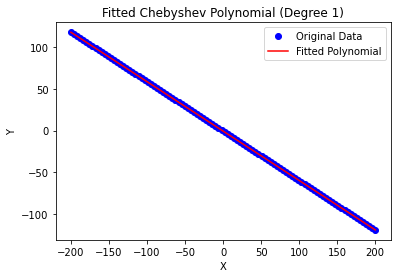

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

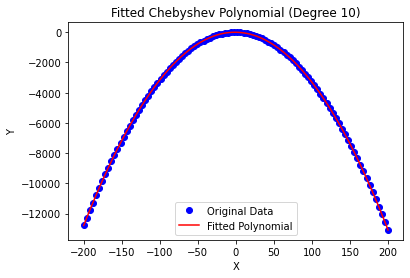

Coordinate Set:
X values: (191.75553084557436, 189.9976006837223, 188.23967052187027, 186.48174036001825, 184.7238101981662, 182.96588003631416, 181.20794987446214, 179.4500197126101, 177.69208955075806, 175.934159388906, 174.17622922705397, 172.41829906520195, 170.6603689033499, 168.90243874149786, 167.14450857964584, 165.3865784177938, 163.62864825594175, 161.8707180940897, 160.11278793223767, 158.35485777038565, 156.5969276085336, 154.83899744668156, 153.08106728482954, 151.3231371229775, 149.56520696112545, 147.8072767992734, 146.04934663742137, 144.29141647556935, 142.5334863137173, 140.77555615186526, 139.01762599001324, 137.2596958281612, 135.50176566630915, 133.7438355044571, 131.98590534260507, 130.22797518075305, 128.470045018901, 126.71211485704896, 124.95418469519693, 123.1962545333449, 121.43832437149285, 119.68039420964081, 117.92246404778878, 116.16453388593675, 114.4066037240847, 112.64867356223266, 110.89074340038063, 109.1328132385286, 107.37488307667655, 105.61695291

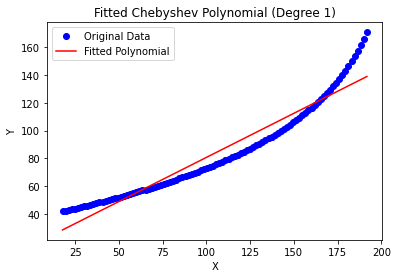

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

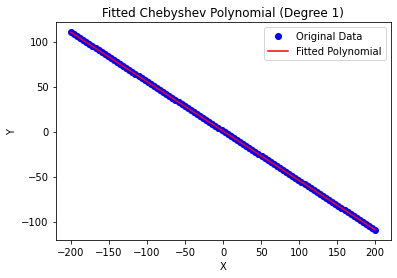

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

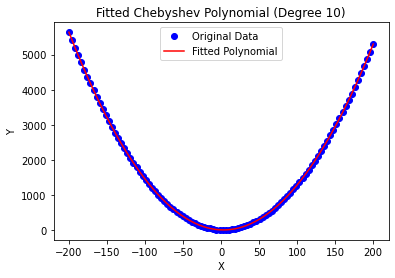

Coordinate Set:
X values: (-71.91864145005505, -73.12271382348116, -74.32678619690728, -75.5308585703334, -76.73493094375951, -77.93900331718562, -79.14307569061174, -80.34714806403785, -81.55122043746397, -82.75529281089008, -83.9593651843162, -85.16343755774233, -86.36750993116843, -87.57158230459456, -88.77565467802067, -89.97972705144679, -91.1837994248729, -92.38787179829902, -93.59194417172513, -94.79601654515125, -96.00008891857736, -97.20416129200348, -98.40823366542959, -99.6123060388557, -100.81637841228182, -102.02045078570794, -103.22452315913405, -104.42859553256017, -105.6326679059863, -106.8367402794124, -108.04081265283853, -109.24488502626463, -110.44895739969076, -111.65302977311686, -112.85710214654299, -114.06117451996909, -115.26524689339522, -116.46931926682132, -117.67339164024744, -118.87746401367356, -120.08153638709967, -121.28560876052579, -122.4896811339519, -123.69375350737802, -124.89782588080413, -126.10189825423025, -127.30597062765636, -128.510043001082

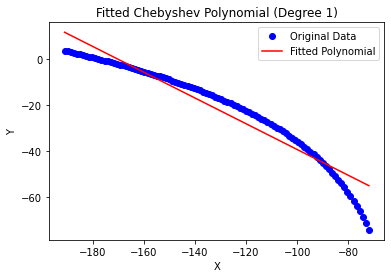

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

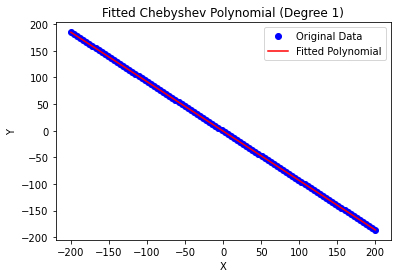

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

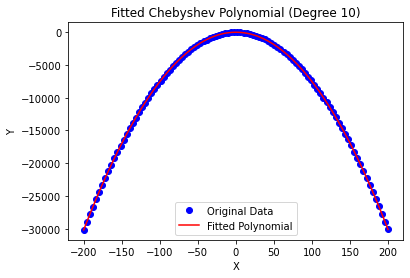

Coordinate Set:
X values: (-79.57065943716715, -78.14112941036207, -76.711599383557, -75.28206935675192, -73.85253932994685, -72.42300930314177, -70.9934792763367, -69.56394924953162, -68.13441922272654, -66.70488919592147, -65.27535916911638, -63.84582914231132, -62.416299115506234, -60.986769088701166, -59.557239061896084, -58.12770903509101, -56.69817900828593, -55.26864898148086, -53.83911895467578, -52.4095889278707, -50.98005890106563, -49.55052887426055, -48.120998847455475, -46.6914688206504, -45.261938793845324, -43.83240876704025, -42.402878740235174, -40.9733487134301, -39.543818686625016, -38.11428865981994, -36.684758633014866, -35.25522860620979, -33.825698579404715, -32.39616855259964, -30.966638525794565, -29.53710849898949, -28.107578472184414, -26.678048445379332, -25.248518418574257, -23.81898839176918, -22.389458364964106, -20.95992833815903, -19.530398311353956, -18.10086828454888, -16.6713382577438, -15.24180823093873, -13.812278204133648, -12.38274817732858, -10.

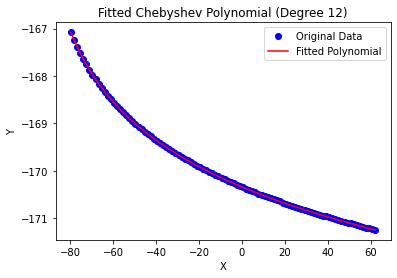

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

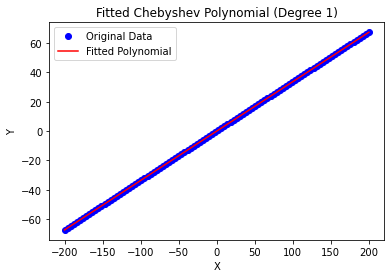

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

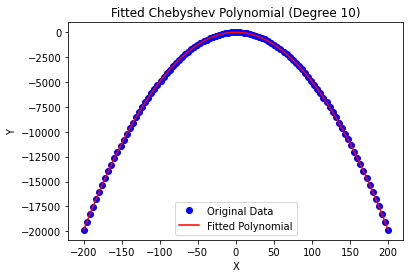

Coordinate Set:
X values: (-82.52581930452835, -83.02750479828713, -83.52919029204588, -84.03087578580465, -84.53256127956342, -85.03424677332218, -85.53593226708095, -86.03761776083972, -86.53930325459848, -87.04098874835725, -87.54267424211602, -88.04435973587478, -88.54604522963355, -89.04773072339232, -89.54941621715108, -90.05110171090985, -90.55278720466862, -91.05447269842738, -91.55615819218615, -92.05784368594492, -92.55952917970367, -93.06121467346244, -93.56290016722122, -94.06458566097997, -94.56627115473874, -95.06795664849751, -95.56964214225627, -96.07132763601504, -96.57301312977381, -97.07469862353257, -97.57638411729134, -98.07806961105011, -98.57975510480887, -99.08144059856764, -99.58312609232641, -100.08481158608517, -100.58649707984394, -101.0881825736027, -101.58986806736146, -102.09155356112024, -102.593239054879, -103.09492454863776, -103.59661004239653, -104.09829553615529, -104.59998102991406, -105.10166652367283, -105.6033520174316, -106.10503751119036, -106

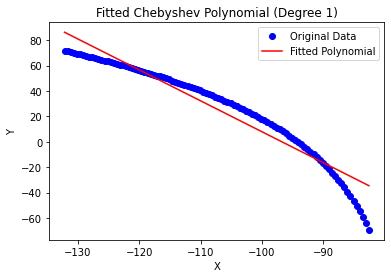

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

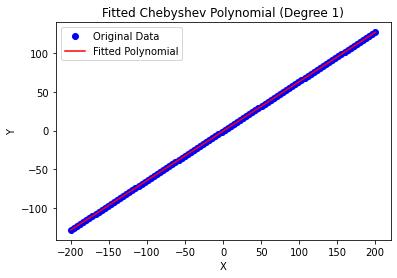

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

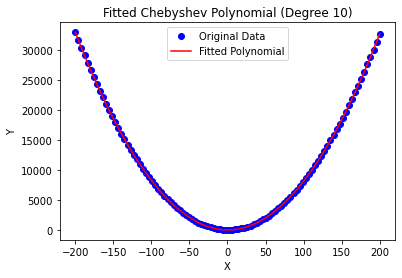

Coordinate Set:
X values: (-89.13456793444969, -87.60039508352483, -86.06622223259997, -84.53204938167511, -82.99787653075023, -81.46370367982537, -79.92953082890051, -78.39535797797565, -76.86118512705079, -75.32701227612591, -73.79283942520105, -72.25866657427619, -70.72449372335133, -69.19032087242647, -67.6561480215016, -66.12197517057675, -64.58780231965187, -63.05362946872701, -61.51945661780215, -59.98528376687729, -58.45111091595242, -56.91693806502756, -55.38276521410269, -53.84859236317783, -52.31441951225297, -50.7802466613281, -49.24607381040324, -47.71190095947838, -46.17772810855351, -44.64355525762865, -43.10938240670379, -41.57520955577892, -40.04103670485406, -38.5068638539292, -36.97269100300433, -35.43851815207947, -33.904345301154606, -32.37017245022974, -30.835999599304877, -29.301826748380016, -27.767653897455148, -26.233481046530287, -24.699308195605425, -23.165135344680564, -21.63096249375569, -20.096789642830828, -18.562616791905967, -17.028443940981106, -15.49

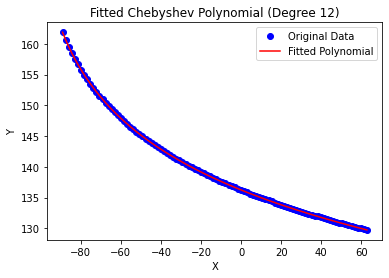

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

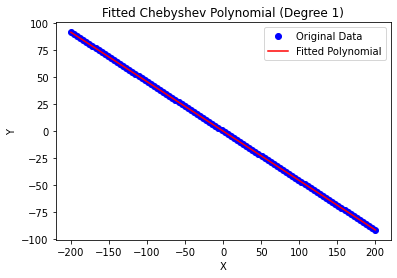

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

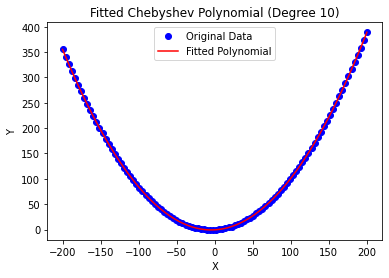

Coordinate Set:
X values: (-101.02545405338672, -101.30508342106704, -101.58471278874735, -101.86434215642768, -102.143971524108, -102.42360089178831, -102.70323025946863, -102.98285962714894, -103.26248899482927, -103.54211836250958, -103.8217477301899, -104.10137709787021, -104.38100646555053, -104.66063583323086, -104.94026520091117, -105.21989456859149, -105.4995239362718, -105.77915330395211, -106.05878267163243, -106.33841203931276, -106.61804140699307, -106.89767077467339, -107.1773001423537, -107.45692951003402, -107.73655887771434, -108.01618824539466, -108.29581761307497, -108.57544698075529, -108.8550763484356, -109.13470571611592, -109.41433508379625, -109.69396445147656, -109.97359381915687, -110.25322318683719, -110.53285255451752, -110.81248192219783, -111.09211128987815, -111.37174065755846, -111.65137002523878, -111.93099939291909, -112.21062876059942, -112.49025812827973, -112.76988749596005, -113.04951686364036, -113.32914623132068, -113.608775599001, -113.8884049666

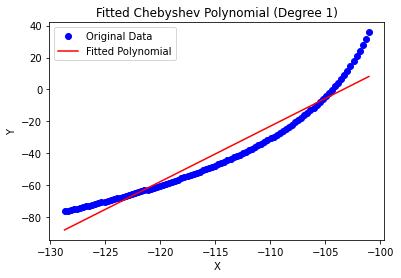

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

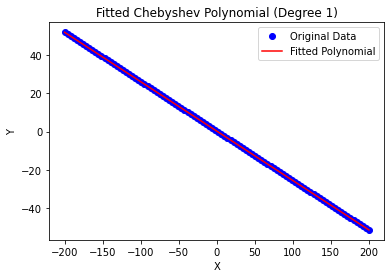

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

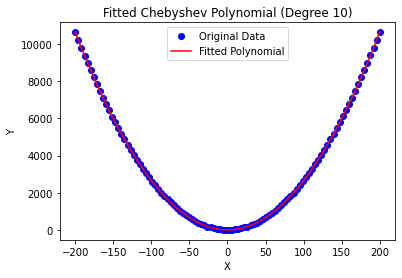

Coordinate Set:
X values: (-154.82861169983715, -153.74203908491808, -152.655466469999, -151.56889385507992, -150.48232124016084, -149.39574862524177, -148.30917601032266, -147.22260339540358, -146.1360307804845, -145.04945816556543, -143.96288555064635, -142.87631293572727, -141.7897403208082, -140.70316770588911, -139.61659509097004, -138.53002247605096, -137.44344986113185, -136.35687724621278, -135.2703046312937, -134.18373201637462, -133.09715940145554, -132.01058678653646, -130.9240141716174, -129.8374415566983, -128.75086894177923, -127.66429632686014, -126.57772371194106, -125.49115109702198, -124.4045784821029, -123.31800586718381, -122.23143325226474, -121.14486063734566, -120.05828802242658, -118.9717154075075, -117.88514279258843, -116.79857017766935, -115.71199756275026, -114.62542494783118, -113.5388523329121, -112.45227971799301, -111.36570710307393, -110.27913448815485, -109.19256187323577, -108.1059892583167, -107.01941664339762, -105.93284402847854, -104.8462714135594

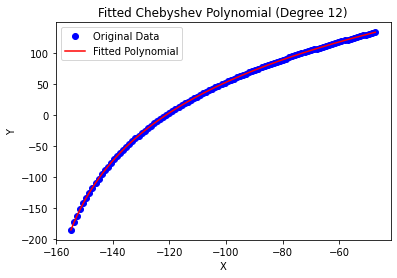

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

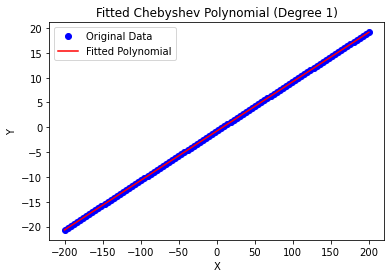

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

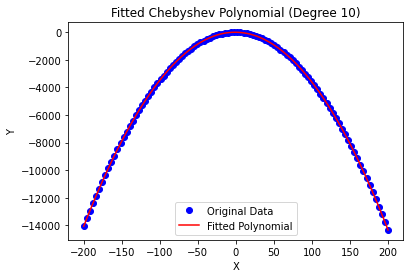

Coordinate Set:
X values: (64.57820200314416, 63.428634124524564, 62.27906624590497, 61.12949836728538, 59.97993048866579, 58.830362610046194, 57.6807947314266, 56.531226852807016, 55.381658974187424, 54.23209109556783, 53.08252321694824, 51.93295533832865, 50.783387459709054, 49.63381958108946, 48.48425170246988, 47.334683823850284, 46.18511594523069, 45.0355480666111, 43.88598018799151, 42.736412309371914, 41.58684443075232, 40.43727655213273, 39.28770867351314, 38.138140794893545, 36.98857291627395, 35.83900503765436, 34.68943715903477, 33.539869280415175, 32.39030140179559, 31.240733523175997, 30.091165644556405, 28.941597765936812, 27.79202988731722, 26.642462008697628, 25.492894130078035, 24.343326251458443, 23.19375837283885, 22.044190494219258, 20.894622615599673, 19.74505473698008, 18.595486858360488, 17.445918979740895, 16.296351101121303, 15.14678322250171, 13.997215343882118, 12.847647465262526, 11.698079586642933, 10.54851170802334, 9.398943829403748, 8.249375950784163, 7.

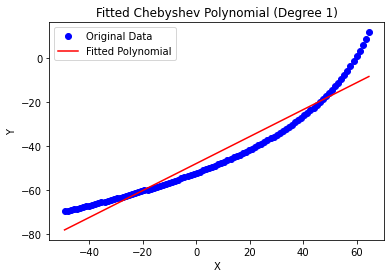

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

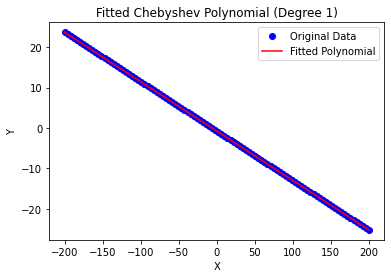

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

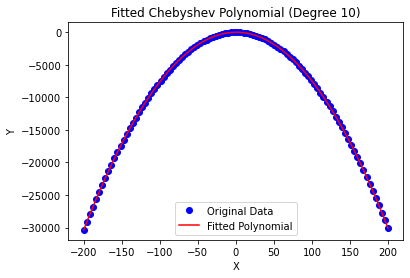

Coordinate Set:
X values: (-128.8865666840736, -129.25370491885238, -129.62084315363114, -129.9879813884099, -130.35511962318867, -130.72225785796743, -131.0893960927462, -131.45653432752496, -131.82367256230373, -132.1908107970825, -132.55794903186126, -132.92508726664002, -133.29222550141878, -133.65936373619755, -134.0265019709763, -134.39364020575508, -134.76077844053384, -135.12791667531263, -135.4950549100914, -135.86219314487016, -136.22933137964893, -136.5964696144277, -136.96360784920645, -137.33074608398522, -137.69788431876398, -138.06502255354275, -138.4321607883215, -138.79929902310028, -139.16643725787904, -139.5335754926578, -139.90071372743657, -140.26785196221533, -140.6349901969941, -141.00212843177286, -141.36926666655162, -141.7364049013304, -142.10354313610915, -142.47068137088792, -142.83781960566668, -143.20495784044545, -143.5720960752242, -143.93923431000297, -144.30637254478174, -144.6735107795605, -145.04064901433927, -145.40778724911803, -145.77492548389682,

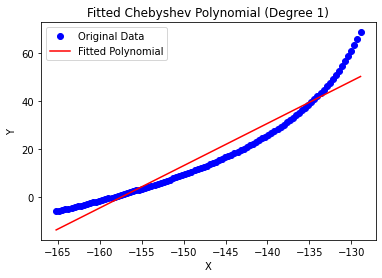

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

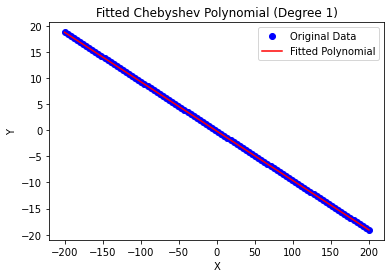

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

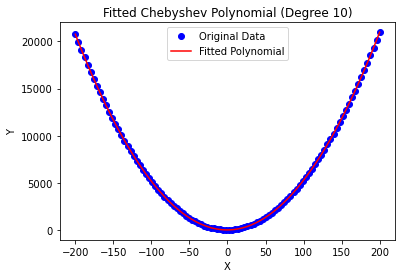

Coordinate Set:
X values: (-12.20322023342132, -13.722917508759588, -15.242614784097857, -16.762312059436123, -18.282009334774393, -19.80170661011266, -21.321403885450927, -22.841101160789194, -24.360798436127464, -25.880495711465734, -27.400192986804, -28.919890262142268, -30.439587537480534, -31.959284812818805, -33.47898208815707, -34.99867936349534, -36.51837663883361, -38.038073914171875, -39.55777118951015, -41.07746846484841, -42.59716574018668, -44.11686301552495, -45.636560290863216, -47.15625756620148, -48.67595484153975, -50.19565211687802, -51.71534939221629, -53.235046667554556, -54.75474394289282, -56.27444121823109, -57.79413849356936, -59.31383576890763, -60.8335330442459, -62.35323031958416, -63.87292759492243, -65.3926248702607, -66.91232214559898, -68.43201942093724, -69.9517166962755, -71.47141397161377, -72.99111124695204, -74.51080852229032, -76.03050579762858, -77.55020307296685, -79.06990034830511, -80.58959762364339, -82.10929489898164, -83.62899217431992, -85.

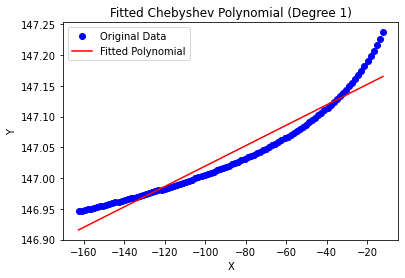

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

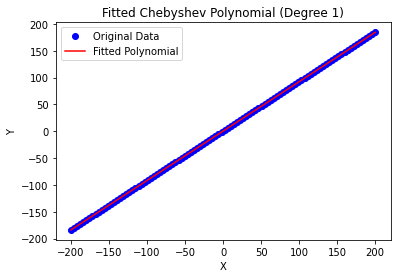

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

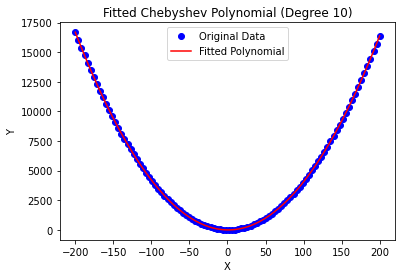

Coordinate Set:
X values: (178.00154155155911, 174.7923510503156, 171.5831605490721, 168.37397004782858, 165.16477954658507, 161.95558904534155, 158.74639854409804, 155.53720804285453, 152.32801754161102, 149.1188270403675, 145.909636539124, 142.70044603788048, 139.49125553663697, 136.2820650353935, 133.07287453414995, 129.86368403290646, 126.65449353166294, 123.44530303041942, 120.23611252917591, 117.0269220279324, 113.81773152668889, 110.60854102544538, 107.39935052420186, 104.19016002295835, 100.98096952171485, 97.77177902047134, 94.56258851922783, 91.35339801798432, 88.1442075167408, 84.9350170154973, 81.72582651425378, 78.51663601301027, 75.30744551176676, 72.09825501052325, 68.88906450927973, 65.67987400803622, 62.47068350679271, 59.2614930055492, 56.052302504305686, 52.843112003062174, 49.63392150181866, 46.42473100057515, 43.21554049933164, 40.006349998088126, 36.797159496844614, 33.5879689956011, 30.37877849435759, 27.169587993114078, 23.960397491870594, 20.751206990627082, 17

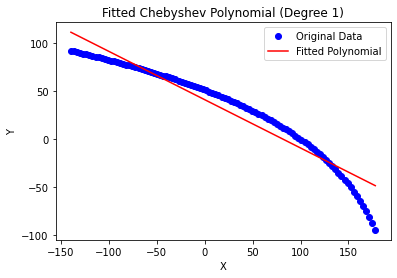

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

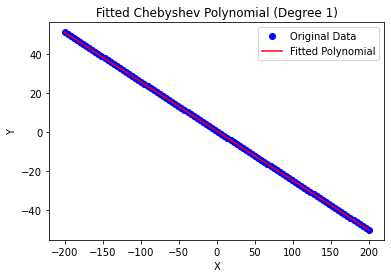

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

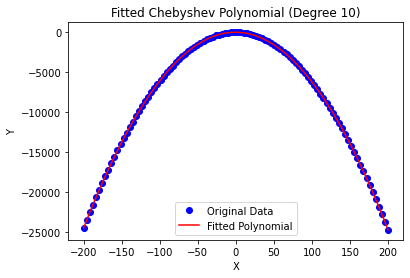

Coordinate Set:
X values: (-142.4541575473572, -140.4236693373262, -138.39318112729524, -136.36269291726424, -134.33220470723327, -132.30171649720228, -130.2712282871713, -128.24074007714032, -126.21025186710935, -124.17976365707837, -122.14927544704739, -120.1187872370164, -118.08829902698542, -116.05781081695443, -114.02732260692346, -111.99683439689247, -109.9663461868615, -107.9358579768305, -105.90536976679954, -103.87488155676854, -101.84439334673758, -99.81390513670658, -97.78341692667561, -95.75292871664462, -93.72244050661364, -91.69195229658266, -89.66146408655167, -87.6309758765207, -85.60048766648971, -83.56999945645873, -81.53951124642775, -79.50902303639677, -77.47853482636579, -75.4480466163348, -73.41755840630383, -71.38707019627284, -69.35658198624186, -67.32609377621088, -65.2956055661799, -63.26511735614892, -61.23462914611794, -59.20414093608696, -57.17365272605598, -55.143164516024996, -53.112676305994015, -51.08218809596303, -49.05169988593205, -47.02121167590107,

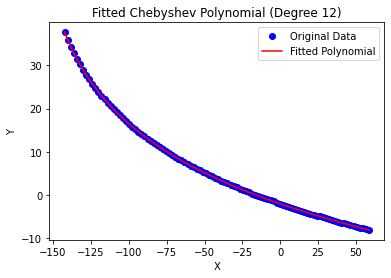

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

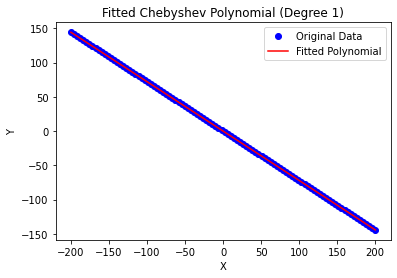

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

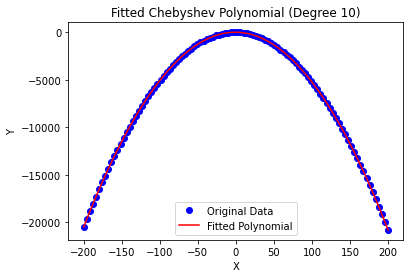

Coordinate Set:
X values: (-118.89173368407367, -119.33865323531491, -119.78557278655616, -120.2324923377974, -120.67941188903865, -121.12633144027988, -121.57325099152114, -122.02017054276237, -122.46709009400362, -122.91400964524486, -123.36092919648611, -123.80784874772735, -124.2547682989686, -124.70168785020984, -125.14860740145109, -125.59552695269232, -126.04244650393358, -126.48936605517481, -126.93628560641606, -127.3832051576573, -127.83012470889855, -128.2770442601398, -128.72396381138103, -129.17088336262228, -129.61780291386353, -130.06472246510475, -130.511642016346, -130.95856156758725, -131.4054811188285, -131.85240067006973, -132.29932022131098, -132.74623977255223, -133.19315932379348, -133.6400788750347, -134.08699842627595, -134.5339179775172, -134.98083752875846, -135.42775707999968, -135.87467663124093, -136.32159618248218, -136.7685157337234, -137.21543528496466, -137.6623548362059, -138.10927438744716, -138.5561939386884, -139.00311348992963, -139.45003304117088

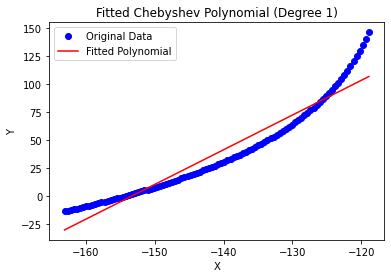

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

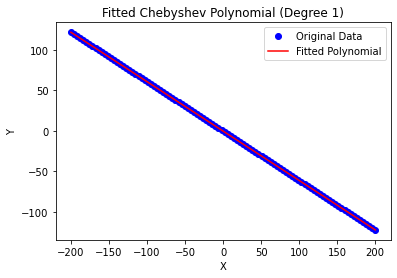

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

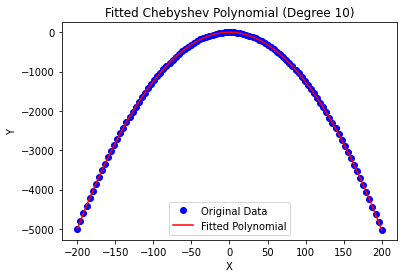

Coordinate Set:
X values: (-180.80901160898134, -177.9816939748445, -175.15437634070764, -172.32705870657077, -169.49974107243392, -166.67242343829707, -163.8451058041602, -161.01778817002335, -158.1904705358865, -155.36315290174966, -152.5358352676128, -149.70851763347594, -146.8811999993391, -144.05388236520224, -141.22656473106537, -138.39924709692852, -135.57192946279167, -132.74461182865483, -129.91729419451798, -127.0899765603811, -124.26265892624426, -121.43534129210741, -118.60802365797055, -115.78070602383369, -112.95338838969684, -110.12607075556, -107.29875312142313, -104.47143548728627, -101.64411785314942, -98.81680021901258, -95.98948258487572, -93.16216495073886, -90.33484731660201, -87.50752968246516, -84.6802120483283, -81.85289441419144, -79.02557678005459, -76.19825914591775, -73.37094151178088, -70.54362387764402, -67.71630624350718, -64.88898860937033, -62.06167097523347, -59.23435334109661, -56.40703570695976, -53.579718072822914, -50.75240043868604, -47.925082804

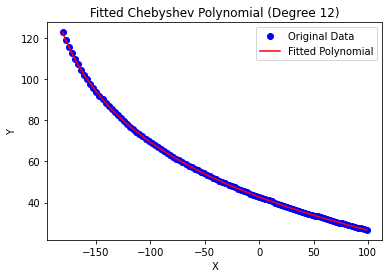

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

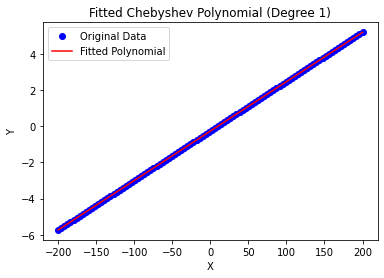

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

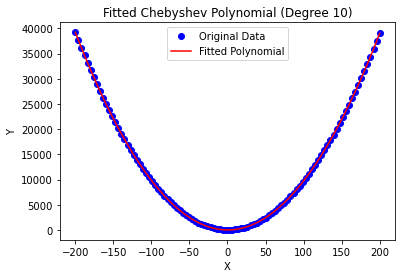

Coordinate Set:
X values: (164.41851303246654, 163.36026679249747, 162.30202055252843, 161.24377431255937, 160.18552807259033, 159.12728183262126, 158.0690355926522, 157.01078935268316, 155.9525431127141, 154.89429687274506, 153.836050632776, 152.77780439280696, 151.7195581528379, 150.66131191286883, 149.6030656728998, 148.54481943293072, 147.48657319296169, 146.42832695299262, 145.37008071302358, 144.31183447305452, 143.25358823308545, 142.19534199311641, 141.13709575314735, 140.07884951317828, 139.02060327320925, 137.96235703324018, 136.90411079327114, 135.84586455330208, 134.78761831333304, 133.72937207336398, 132.6711258333949, 131.61287959342587, 130.5546333534568, 129.49638711348777, 128.4381408735187, 127.37989463354965, 126.3216483935806, 125.26340215361154, 124.2051559136425, 123.14690967367343, 122.08866343370438, 121.03041719373533, 119.97217095376628, 118.91392471379723, 117.85567847382816, 116.79743223385913, 115.73918599389006, 114.68093975392101, 113.62269351395196, 112.

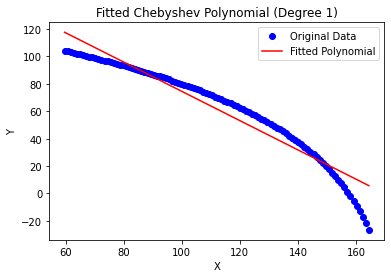

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

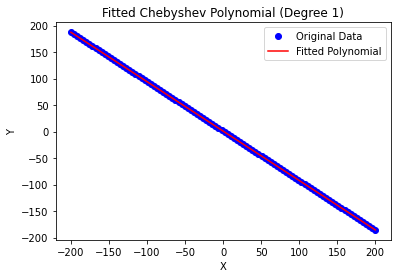

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

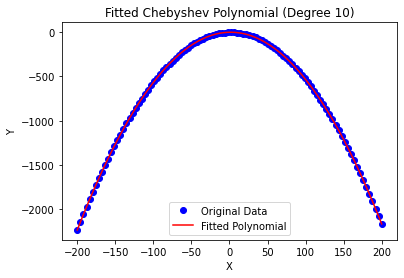

Coordinate Set:
X values: (-79.7831831242347, -80.01509175623015, -80.24700038822562, -80.47890902022107, -80.71081765221653, -80.94272628421199, -81.17463491620745, -81.4065435482029, -81.63845218019836, -81.87036081219382, -82.10226944418928, -82.33417807618474, -82.5660867081802, -82.79799534017565, -83.02990397217111, -83.26181260416656, -83.49372123616203, -83.72562986815748, -83.95753850015295, -84.1894471321484, -84.42135576414387, -84.65326439613932, -84.88517302813477, -85.11708166013024, -85.34899029212569, -85.58089892412116, -85.81280755611661, -86.04471618811206, -86.27662482010753, -86.50853345210298, -86.74044208409845, -86.9723507160939, -87.20425934808937, -87.43616798008482, -87.66807661208027, -87.89998524407574, -88.13189387607119, -88.36380250806666, -88.59571114006211, -88.82761977205757, -89.05952840405303, -89.29143703604848, -89.52334566804394, -89.7552543000394, -89.98716293203486, -90.21907156403032, -90.45098019602577, -90.68288882802123, -90.91479746001669,

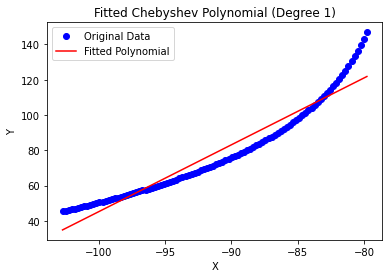

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

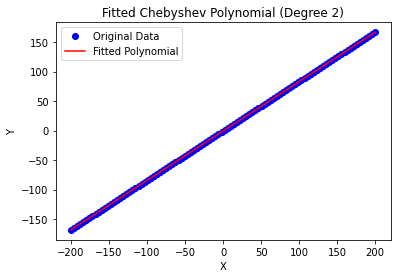

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

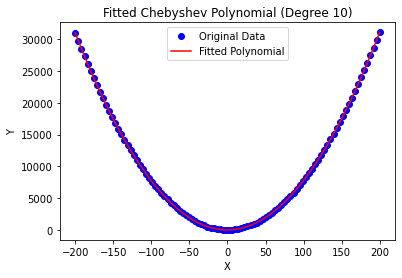

Coordinate Set:
X values: (36.57848409817075, 34.41789446340436, 32.25730482863797, 30.09671519387158, 27.936125559105193, 25.775535924338804, 23.614946289572412, 21.454356654806023, 19.293767020039635, 17.133177385273246, 14.972587750506857, 12.811998115740469, 10.651408480974077, 8.490818846207688, 6.330229211441299, 4.169639576674911, 2.009049941908522, -0.15153969285786673, -2.3121293276242554, -4.472718962390644, -6.633308597157033, -8.793898231923421, -10.95448786668981, -13.115077501456199, -15.275667136222594, -17.436256770988983, -19.59684640575537, -21.75743604052176, -23.91802567528815, -26.078615310054538, -28.239204944820926, -30.399794579587308, -32.560384214353704, -34.7209738491201, -36.88156348388648, -39.04215311865288, -41.20274275341926, -43.363332388185654, -45.523922022952036, -47.68451165771843, -49.84510129248481, -52.00569092725121, -54.16628056201759, -56.326870196783986, -58.48745983155037, -60.64804946631676, -62.808639101083145, -64.96922873584954, -67.1298

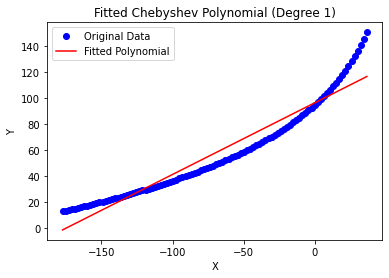

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

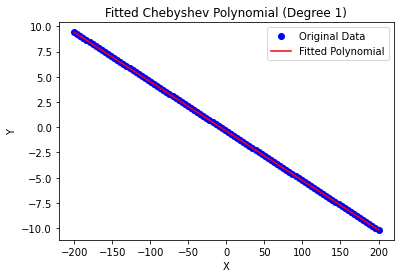

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

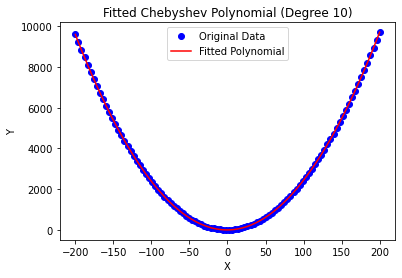

Coordinate Set:
X values: (-33.84095222709078, -31.757504745170237, -29.67405726324969, -27.590609781329142, -25.5071622994086, -23.423714817488055, -21.340267335567507, -19.25681985364696, -17.173372371726416, -15.089924889805872, -13.006477407885324, -10.923029925964777, -8.839582444044233, -6.756134962123689, -4.672687480203141, -2.5892399982825935, -0.5057925163620496, 1.5776549655584944, 3.6611024474790383, 5.744549929399589, 7.827997411320133, 9.911444893240677, 11.994892375161228, 14.078339857081772, 16.161787339002316, 18.24523482092286, 20.328682302843404, 22.412129784763955, 24.4955772666845, 26.579024748605043, 28.662472230525594, 30.74591971244614, 32.82936719436668, 34.912814676287226, 36.99626215820777, 39.079709640128314, 41.16315712204886, 43.246604603969416, 45.33005208588996, 47.413499567810504, 49.49694704973105, 51.58039453165159, 53.663842013572136, 55.74728949549268, 57.83073697741324, 59.91418445933378, 61.997631941254326, 64.08107942317487, 66.16452690509541, 68

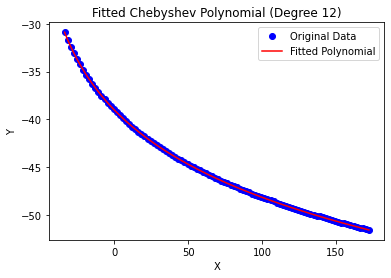

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

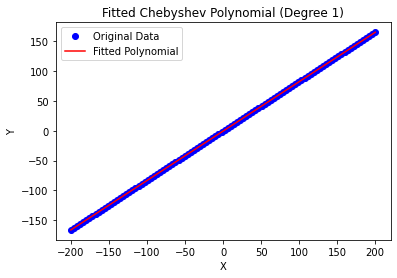

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

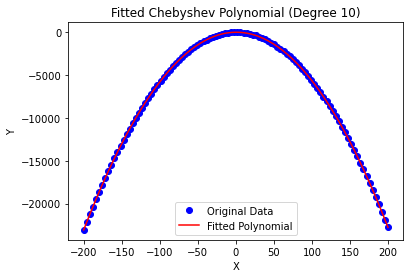

Coordinate Set:
X values: (62.227290544786285, 62.75569978669755, 63.2841090286088, 63.81251827052006, 64.34092751243132, 64.86933675434258, 65.39774599625383, 65.9261552381651, 66.45456448007636, 66.98297372198762, 67.51138296389888, 68.03979220581013, 68.56820144772139, 69.09661068963266, 69.6250199315439, 70.15342917345517, 70.68183841536643, 71.21024765727769, 71.73865689918895, 72.2670661411002, 72.79547538301146, 73.32388462492273, 73.85229386683397, 74.38070310874524, 74.9091123506565, 75.43752159256776, 75.96593083447902, 76.49434007639027, 77.02274931830154, 77.5511585602128, 78.07956780212405, 78.60797704403531, 79.13638628594657, 79.66479552785783, 80.1932047697691, 80.72161401168034, 81.2500232535916, 81.77843249550287, 82.30684173741412, 82.83525097932538, 83.36366022123664, 83.8920694631479, 84.42047870505917, 84.94888794697042, 85.47729718888168, 86.00570643079294, 86.53411567270419, 87.06252491461545, 87.59093415652671, 88.11934339843798, 88.64775264034924, 89.176161882

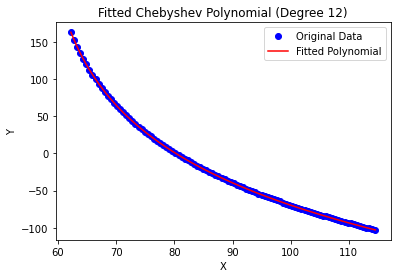

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

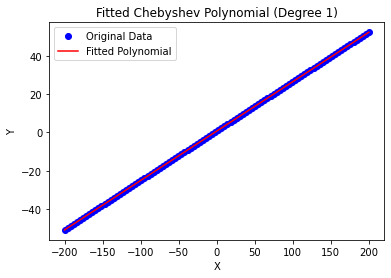

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

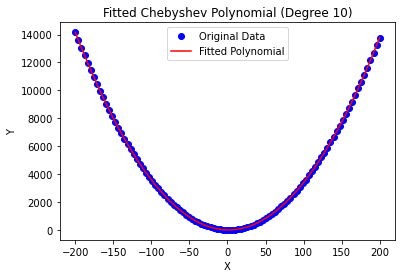

Coordinate Set:
X values: (-22.651528715411786, -20.707389477373038, -18.76325023933429, -16.819111001295543, -14.874971763256795, -12.930832525218047, -10.9866932871793, -9.042554049140552, -7.098414811101804, -5.154275573063057, -3.210136335024309, -1.2659970969855614, 0.6781421410531863, 2.622281379091934, 4.566420617130682, 6.510559855169429, 8.454699093208177, 10.398838331246921, 12.342977569285672, 14.287116807324423, 16.231256045363168, 18.17539528340191, 20.119534521440663, 22.063673759479414, 24.00781299751816, 25.951952235556902, 27.896091473595654, 29.840230711634405, 31.78436994967315, 33.72850918771189, 35.672648425750644, 37.616787663789395, 39.56092690182814, 41.505066139866884, 43.44920537790563, 45.393344615944386, 47.33748385398313, 49.281623092021874, 51.22576233006063, 53.16990156809938, 55.11404080613812, 57.058180044176865, 59.00231928221561, 60.94645852025437, 62.89059775829311, 64.83473699633186, 66.77887623437061, 68.72301547240936, 70.6671547104481, 72.6112939

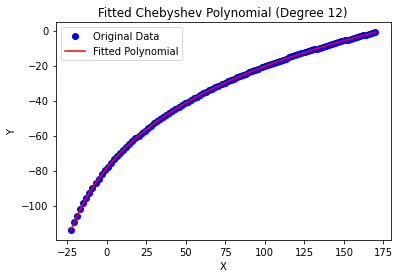

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

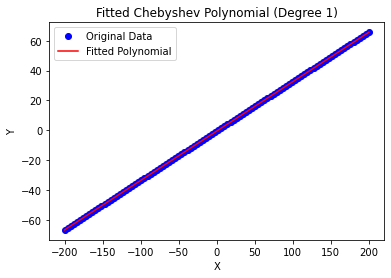

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

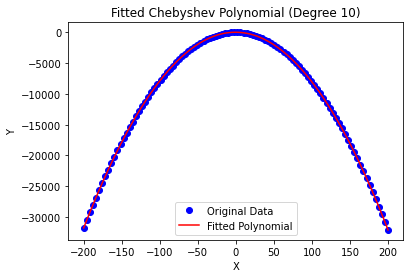

Coordinate Set:
X values: (44.64963324527801, 44.78497025188911, 44.920307258500216, 45.05564426511132, 45.19098127172242, 45.326318278333524, 45.46165528494462, 45.59699229155572, 45.732329298166825, 45.86766630477793, 46.00300331138903, 46.13834031800013, 46.273677324611235, 46.40901433122234, 46.54435133783344, 46.67968834444454, 46.815025351055645, 46.95036235766675, 47.08569936427784, 47.221036370888946, 47.35637337750005, 47.49171038411115, 47.627047390722254, 47.762384397333356, 47.89772140394446, 48.03305841055556, 48.168395417166664, 48.30373242377777, 48.43906943038887, 48.574406436999965, 48.70974344361107, 48.84508045022217, 48.98041745683327, 49.115754463444375, 49.25109147005548, 49.38642847666658, 49.52176548327768, 49.657102489888786, 49.79243949649989, 49.92777650311099, 50.063113509722086, 50.19845051633319, 50.33378752294429, 50.469124529555394, 50.6044615361665, 50.7397985427776, 50.8751355493887, 51.010472555999804, 51.14580956261091, 51.28114656922201, 51.41648357

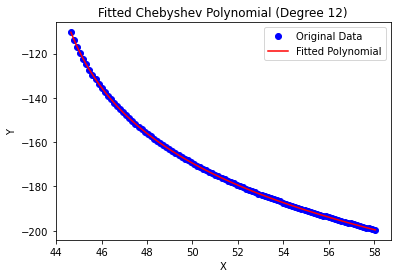

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

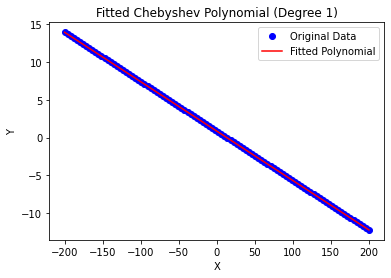

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

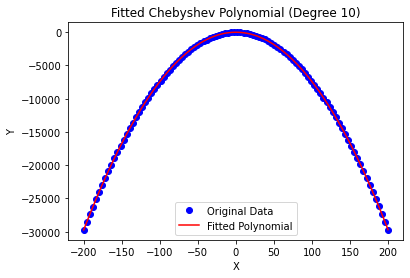

Coordinate Set:
X values: (58.259326019329706, 56.085890444843834, 53.912454870357955, 51.73901929587208, 49.56558372138621, 47.39214814690034, 45.21871257241446, 43.04527699792859, 40.87184142344272, 38.69840584895684, 36.52497027447097, 34.351534699985095, 32.178099125499216, 30.004663551013344, 27.83122797652747, 25.657792402041594, 23.48435682755572, 21.31092125306985, 19.13748567858397, 16.9640501040981, 14.790614529612228, 12.617178955126349, 10.443743380640477, 8.270307806154605, 6.096872231668726, 3.9234366571828545, 1.7500010826969827, -0.42343449178888903, -2.596870066274768, -4.77030564076064, -6.9437412152465185, -9.117176789732383, -11.290612364218262, -13.464047938704141, -15.637483513190006, -17.810919087675884, -19.984354662161763, -22.157790236647628, -24.331225811133507, -26.504661385619386, -28.67809696010525, -30.85153253459113, -33.02496810907701, -35.19840368356287, -37.37183925804875, -39.54527483253463, -41.718710407020495, -43.892145981506374, -46.0655815559922

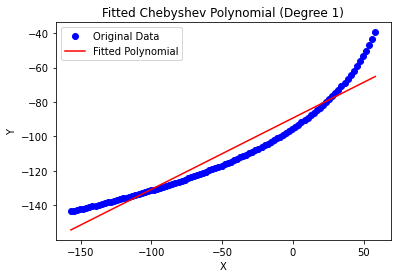

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

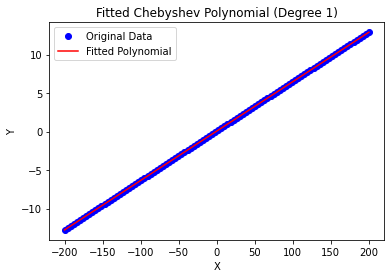

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

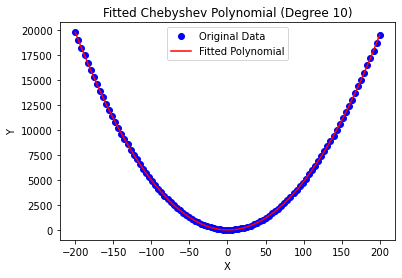

Coordinate Set:
X values: (-167.16499706932532, -164.23900427014775, -161.31301147097017, -158.38701867179256, -155.46102587261498, -152.5350330734374, -149.60904027425983, -146.68304747508222, -143.75705467590464, -140.83106187672706, -137.90506907754948, -134.9790762783719, -132.0530834791943, -129.12709068001672, -126.20109788083914, -123.27510508166155, -120.34911228248396, -117.42311948330638, -114.4971266841288, -111.57113388495121, -108.64514108577362, -105.71914828659604, -102.79315548741846, -99.86716268824087, -96.94116988906329, -94.0151770898857, -91.08918429070812, -88.16319149153053, -85.23719869235295, -82.31120589317536, -79.38521309399778, -76.45922029482018, -73.5332274956426, -70.60723469646503, -67.68124189728744, -64.75524909810986, -61.829256298932265, -58.90326349975469, -55.977270700577094, -53.051277901399516, -50.12528510222192, -47.199292303044345, -44.27329950386675, -41.347306704689174, -38.421313905511596, -35.49532110633399, -32.56932830715641, -29.643335

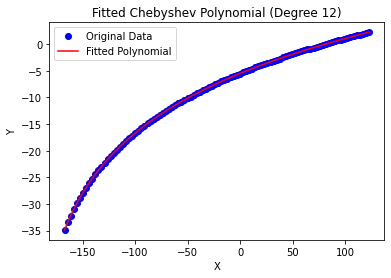

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

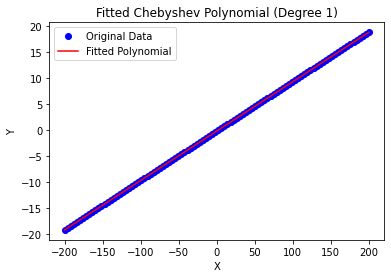

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

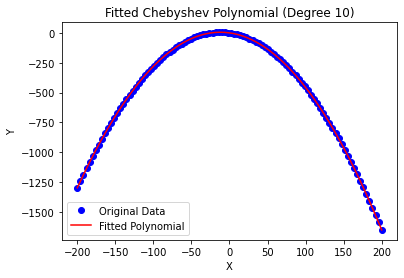

Coordinate Set:
X values: (25.21684903482796, 23.49728964224215, 21.777730249656347, 20.05817085707054, 18.338611464484735, 16.619052071898928, 14.89949267931312, 13.179933286727314, 11.460373894141508, 9.740814501555702, 8.021255108969896, 6.3016957163840885, 4.582136323798281, 2.8625769312124767, 1.143017538626669, -0.5765418539591352, -2.296101246544943, -4.0156606391307506, -5.735220031716555, -7.454779424302359, -9.174338816888167, -10.893898209473974, -12.613457602059782, -14.33301699464559, -16.052576387231397, -17.772135779817198, -19.491695172403006, -21.211254564988813, -22.93081395757462, -24.65037335016043, -26.36993274274623, -28.089492135332037, -29.809051527917845, -31.528610920503652, -33.24817031308946, -34.96772970567526, -36.68728909826107, -38.406848490846876, -40.12640788343268, -41.845967276018484, -43.56552666860429, -45.2850860611901, -47.00464545377591, -48.724204846361715, -50.44376423894752, -52.16332363153333, -53.88288302411914, -55.602442416704946, -57.322

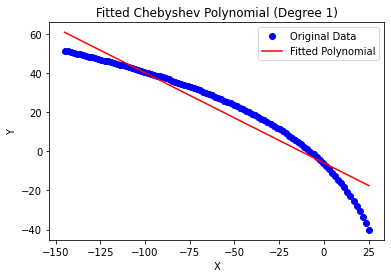

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

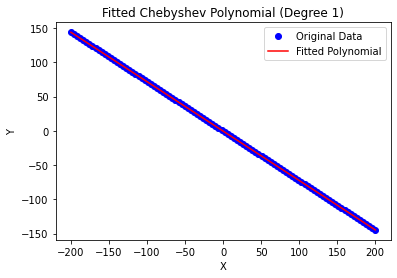

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

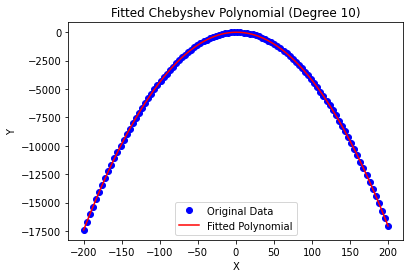

Coordinate Set:
X values: (180.075471735081, 177.28770788152744, 174.49994402797387, 171.7121801744203, 168.92441632086673, 166.13665246731316, 163.34888861375958, 160.561124760206, 157.77336090665244, 154.98559705309887, 152.1978331995453, 149.41006934599173, 146.62230549243816, 143.83454163888456, 141.04677778533102, 138.25901393177742, 135.47125007822387, 132.68348622467028, 129.89572237111673, 127.10795851756315, 124.32019466400958, 121.53243081045599, 118.74466695690242, 115.95690310334886, 113.16913924979528, 110.38137539624171, 107.59361154268814, 104.80584768913457, 102.018083835581, 99.23031998202742, 96.44255612847385, 93.65479227492028, 90.86702842136671, 88.07926456781314, 85.29150071425957, 82.503736860706, 79.71597300715243, 76.92820915359886, 74.14044530004529, 71.35268144649172, 68.56491759293814, 65.77715373938456, 62.98938988583099, 60.20162603227742, 57.413862178723846, 54.626098325170275, 51.83833447161672, 49.05057061806315, 46.26280676450955, 43.47504291095598, 40

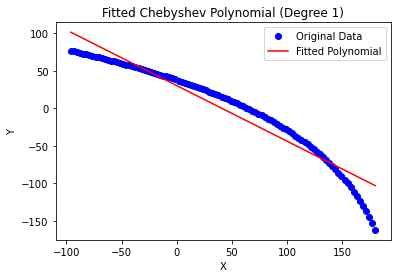

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

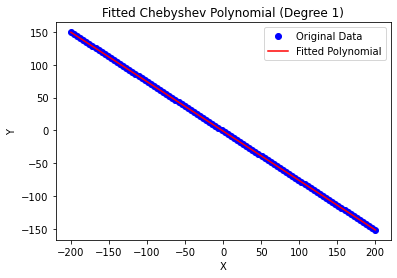

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

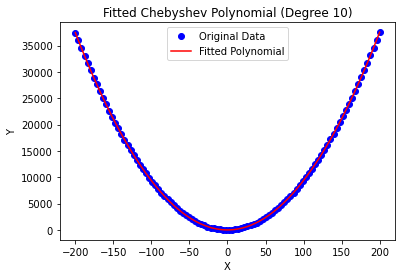

Coordinate Set:
X values: (97.61821117866043, 97.11251524206125, 96.60681930546207, 96.10112336886289, 95.59542743226369, 95.08973149566451, 94.58403555906533, 94.07833962246615, 93.57264368586696, 93.06694774926778, 92.5612518126686, 92.0555558760694, 91.54985993947022, 91.04416400287104, 90.53846806627186, 90.03277212967268, 89.5270761930735, 89.02138025647432, 88.51568431987513, 88.00998838327594, 87.50429244667676, 86.99859651007758, 86.4929005734784, 85.98720463687921, 85.48150870028003, 84.97581276368084, 84.47011682708165, 83.96442089048247, 83.45872495388329, 82.95302901728411, 82.44733308068493, 81.94163714408575, 81.43594120748656, 80.93024527088737, 80.42454933428819, 79.918853397689, 79.41315746108982, 78.90746152449064, 78.40176558789146, 77.89606965129227, 77.39037371469308, 76.8846777780939, 76.37898184149472, 75.87328590489554, 75.36758996829636, 74.86189403169718, 74.356198095098, 73.85050215849881, 73.34480622189962, 72.83911028530044, 72.33341434870125, 71.8277184121

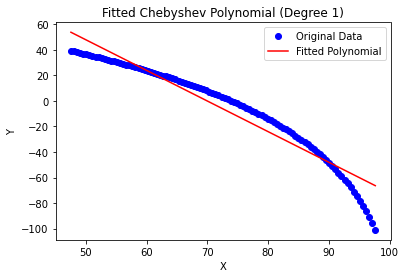

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

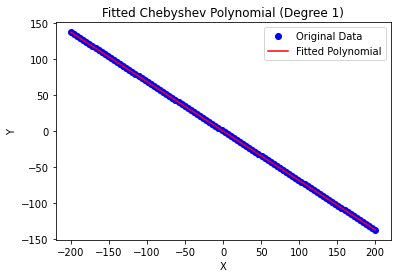

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

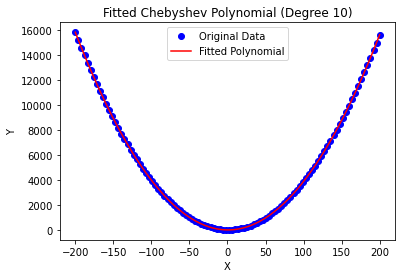

Coordinate Set:
X values: (-141.72291733853348, -139.37371602200002, -137.02451470546657, -134.67531338893315, -132.3261120723997, -129.97691075586624, -127.62770943933279, -125.27850812279934, -122.9293068062659, -120.58010548973245, -118.23090417319901, -115.88170285666556, -113.5325015401321, -111.18330022359865, -108.83409890706521, -106.48489759053176, -104.13569627399832, -101.78649495746487, -99.43729364093141, -97.08809232439796, -94.73889100786452, -92.38968969133107, -90.04048837479763, -87.69128705826418, -85.34208574173073, -82.99288442519727, -80.64368310866384, -78.2944817921304, -75.94528047559695, -73.59607915906349, -71.24687784253004, -68.8976765259966, -66.54847520946315, -64.1992738929297, -61.85007257639626, -59.500871259862805, -57.15166994332935, -54.802468626795914, -52.45326731026246, -50.10406599372901, -47.75486467719557, -45.40566336066212, -43.056462044128665, -40.70726072759523, -38.358059411061774, -36.00885809452832, -33.65965677799488, -31.3104554614614

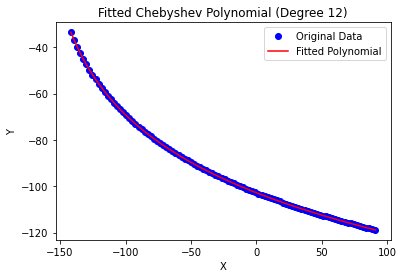

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

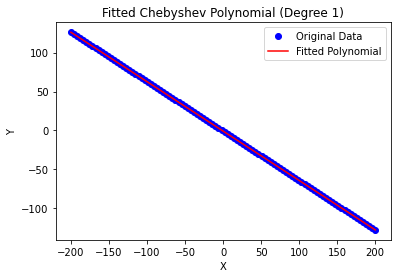

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

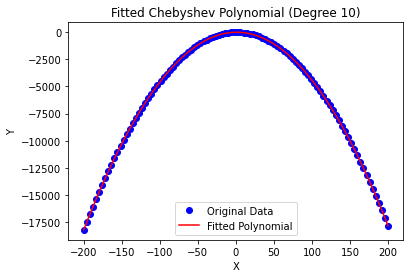

Coordinate Set:
X values: (186.81181089258388, 186.51376823476963, 186.21572557695538, 185.91768291914116, 185.6196402613269, 185.32159760351266, 185.0235549456984, 184.7255122878842, 184.42746963006994, 184.1294269722557, 183.83138431444144, 183.53334165662721, 183.23529899881297, 182.93725634099872, 182.63921368318447, 182.34117102537022, 182.043128367556, 181.74508570974174, 181.4470430519275, 181.14900039411324, 180.85095773629902, 180.55291507848477, 180.25487242067052, 179.95682976285627, 179.65878710504205, 179.3607444472278, 179.06270178941355, 178.7646591315993, 178.46661647378505, 178.16857381597083, 177.87053115815658, 177.57248850034233, 177.27444584252808, 176.97640318471386, 176.6783605268996, 176.38031786908536, 176.0822752112711, 175.7842325534569, 175.48618989564264, 175.1881472378284, 174.89010458001414, 174.5920619221999, 174.29401926438567, 173.99597660657142, 173.69793394875717, 173.39989129094292, 173.1018486331287, 172.80380597531445, 172.5057633175002, 172.20772

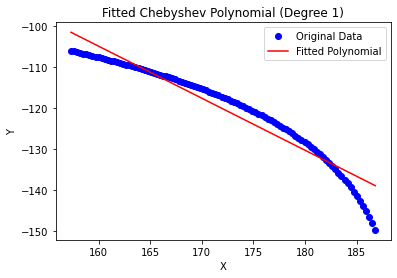

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

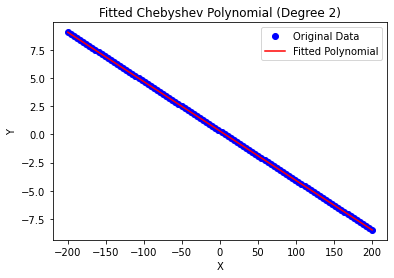

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

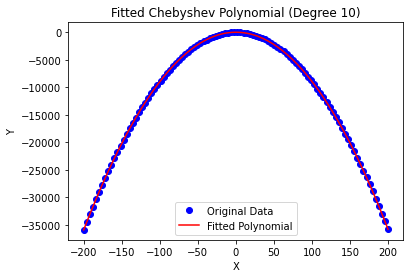

Coordinate Set:
X values: (-184.81122378818705, -181.48435709424487, -178.1574904003027, -174.8306237063605, -171.50375701241833, -168.17689031847615, -164.85002362453397, -161.5231569305918, -158.19629023664962, -154.86942354270744, -151.5425568487653, -148.2156901548231, -144.88882346088093, -141.56195676693875, -138.23509007299657, -134.9082233790544, -131.5813566851122, -128.25448999117003, -124.92762329722785, -121.60075660328567, -118.2738899093435, -114.94702321540132, -111.62015652145914, -108.29328982751696, -104.96642313357478, -101.6395564396326, -98.31268974569042, -94.98582305174826, -91.65895635780608, -88.3320896638639, -85.00522296992172, -81.67835627597954, -78.35148958203736, -75.02462288809518, -71.697756194153, -68.37088950021082, -65.04402280626864, -61.717156112326464, -58.3902894183843, -55.06342272444212, -51.73655603049994, -48.40968933655776, -45.08282264261558, -41.7559559486734, -38.429089254731224, -35.102222560789045, -31.775355866846866, -28.4484891729046

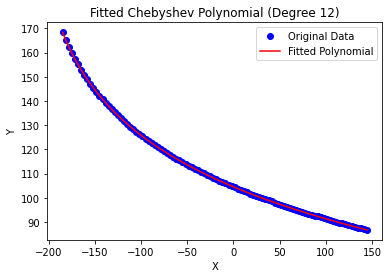

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

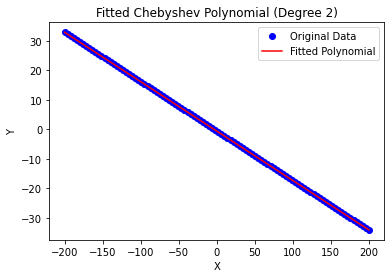

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

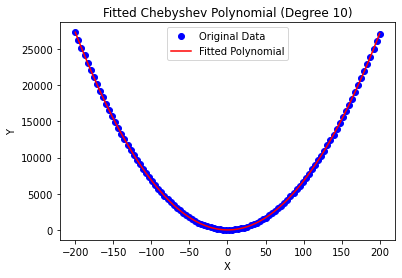

Coordinate Set:
X values: (-56.766414800387764, -54.946587241068016, -53.12675968174826, -51.30693212242851, -49.487104563108765, -47.66727700378901, -45.84744944446926, -44.027621885149514, -42.20779432582977, -40.38796676651001, -38.568139207190264, -36.74831164787051, -34.92848408855076, -33.10865652923101, -31.28882896991126, -29.469001410591513, -27.64917385127176, -25.82934629195201, -24.00951873263226, -22.18969117331251, -20.369863613992763, -18.550036054673008, -16.73020849535326, -14.910380936033512, -13.090553376713757, -11.270725817394009, -9.450898258074261, -7.631070698754513, -5.811243139434758, -3.99141558011501, -2.1715880207952623, -0.3517604614755072, 1.4680670978442407, 3.2878946571639887, 5.107722216483744, 6.927549775803492, 8.747377335123247, 10.567204894442995, 12.387032453762743, 14.20686001308249, 16.02668757240224, 17.846515131721986, 19.66634269104175, 21.486170250361496, 23.305997809681244, 25.125825369000992, 26.94565292832074, 28.765480487640488, 30.58530

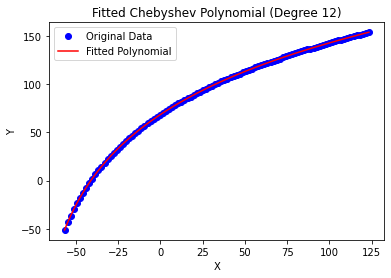

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

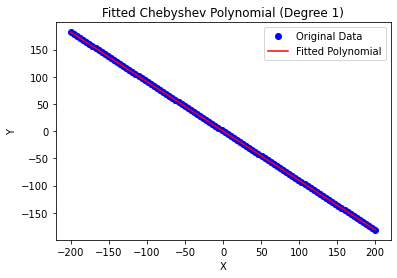

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

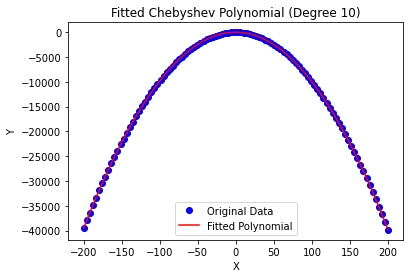

Coordinate Set:
X values: (-60.23994587111528, -61.183095514132475, -62.12624515714966, -63.069394800166855, -64.01254444318404, -64.95569408620123, -65.89884372921843, -66.84199337223562, -67.78514301525281, -68.72829265827, -69.67144230128719, -70.61459194430438, -71.55774158732157, -72.50089123033877, -73.44404087335596, -74.38719051637315, -75.33034015939033, -76.27348980240752, -77.21663944542472, -78.15978908844191, -79.1029387314591, -80.04608837447628, -80.98923801749348, -81.93238766051067, -82.87553730352786, -83.81868694654506, -84.76183658956225, -85.70498623257944, -86.64813587559664, -87.59128551861382, -88.53443516163101, -89.4775848046482, -90.4207344476654, -91.36388409068257, -92.30703373369977, -93.25018337671696, -94.19333301973415, -95.13648266275135, -96.07963230576854, -97.02278194878573, -97.96593159180293, -98.90908123482012, -99.8522308778373, -100.7953805208545, -101.73853016387169, -102.68167980688887, -103.62482944990606, -104.56797909292325, -105.511128735

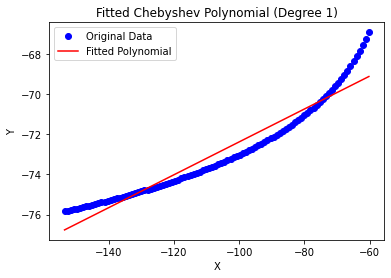

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

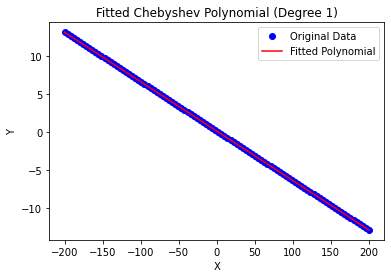

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

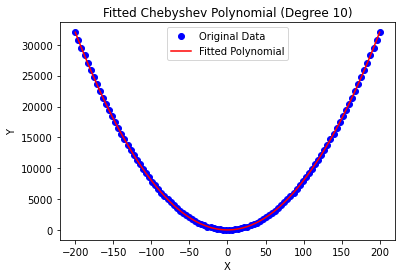

Coordinate Set:
X values: (8.04862342328309, 8.649883792836562, 9.251144162390032, 9.852404531943503, 10.453664901496975, 11.054925271050447, 11.656185640603917, 12.257446010157388, 12.85870637971086, 13.459966749264332, 14.061227118817802, 14.662487488371273, 15.263747857924745, 15.865008227478217, 16.466268597031686, 17.067528966585158, 17.66878933613863, 18.270049705692102, 18.871310075245574, 19.472570444799043, 20.073830814352515, 20.675091183905987, 21.276351553459456, 21.87761192301293, 22.4788722925664, 23.080132662119873, 23.681393031673345, 24.282653401226813, 24.883913770780286, 25.485174140333758, 26.086434509887226, 26.6876948794407, 27.28895524899417, 27.890215618547643, 28.491475988101115, 29.092736357654584, 29.693996727208056, 30.295257096761528, 30.896517466314997, 31.49777783586847, 32.09903820542194, 32.70029857497541, 33.301558944528885, 33.90281931408235, 34.50407968363582, 35.105340053189295, 35.70660042274277, 36.30786079229624, 36.90912116184971, 37.51038153140

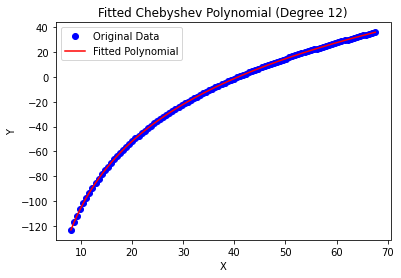

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

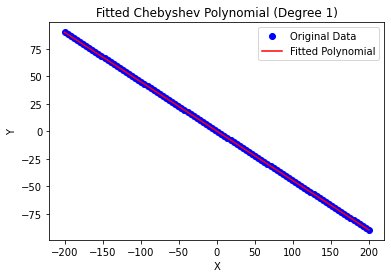

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

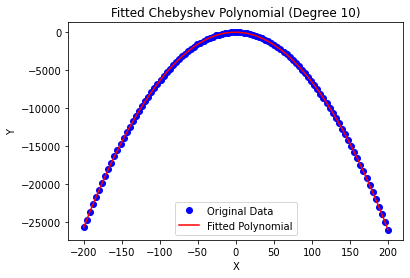

Coordinate Set:
X values: (-61.68230790283329, -59.88129054173812, -58.08027318064295, -56.27925581954778, -54.47823845845261, -52.67722109735744, -50.87620373626227, -49.0751863751671, -47.27416901407193, -45.47315165297675, -43.67213429188159, -41.871116930786414, -40.07009956969125, -38.269082208596075, -36.46806484750091, -34.667047486405735, -32.86603012531057, -31.0650127642154, -29.263995403120227, -27.462978042025057, -25.661960680929887, -23.860943319834718, -22.059925958739548, -20.25890859764438, -18.45789123654921, -16.65687387545404, -14.85585651435887, -13.0548391532637, -11.25382179216853, -9.45280443107336, -7.651787069978191, -5.850769708883021, -4.049752347787852, -2.248734986692682, -0.4477176255975124, 1.3532997354976573, 3.154317096592834, 4.9553344576879965, 6.756351818783173, 8.557369179878336, 10.358386540973513, 12.159403902068675, 13.960421263163852, 15.761438624259014, 17.56245598535419, 19.363473346449354, 21.16449070754453, 22.965508068639693, 24.7665254297

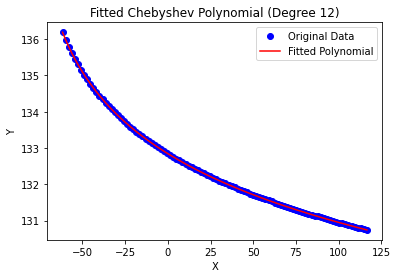

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

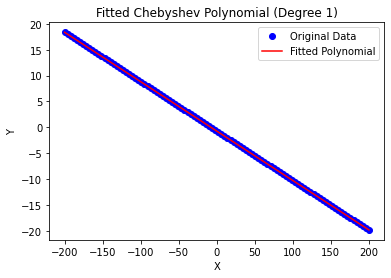

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

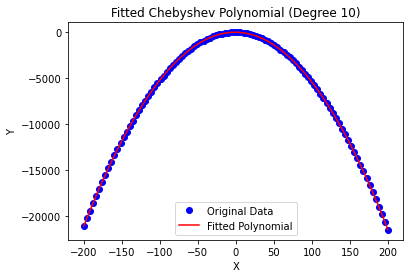

Coordinate Set:
X values: (-119.67299125462172, -118.91487376268695, -118.1567562707522, -117.39863877881743, -116.64052128688267, -115.8824037949479, -115.12428630301315, -114.36616881107838, -113.60805131914361, -112.84993382720886, -112.09181633527409, -111.33369884333933, -110.57558135140457, -109.81746385946981, -109.05934636753504, -108.30122887560029, -107.54311138366552, -106.78499389173075, -106.026876399796, -105.26875890786123, -104.51064141592647, -103.7525239239917, -102.99440643205693, -102.23628894012218, -101.47817144818742, -100.72005395625266, -99.96193646431789, -99.20381897238313, -98.44570148044836, -97.68758398851361, -96.92946649657884, -96.17134900464407, -95.41323151270932, -94.65511402077456, -93.8969965288398, -93.13887903690502, -92.38076154497027, -91.6226440530355, -90.86452656110075, -90.10640906916598, -89.34829157723121, -88.59017408529645, -87.8320565933617, -87.07393910142693, -86.31582160949216, -85.55770411755739, -84.79958662562264, -84.04146913368

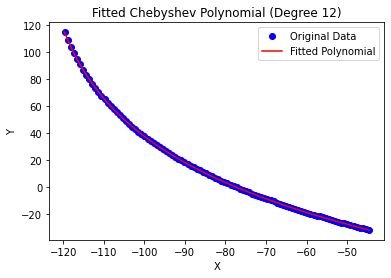

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

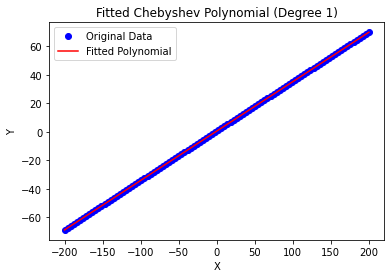

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

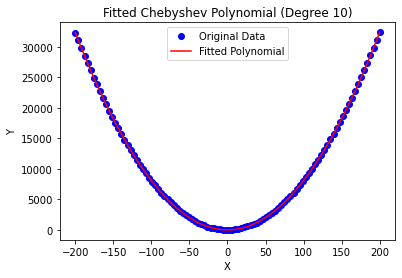

Coordinate Set:
X values: (189.65251872683552, 185.73100818323795, 181.80949763964037, 177.8879870960428, 173.96647655244522, 170.04496600884764, 166.12345546525006, 162.20194492165248, 158.2804343780549, 154.35892383445736, 150.43741329085975, 146.5159027472622, 142.5943922036646, 138.67288166006705, 134.75137111646947, 130.8298605728719, 126.90835002927432, 122.98683948567674, 119.06532894207916, 115.14381839848159, 111.22230785488401, 107.30079731128643, 103.37928676768885, 99.45777622409128, 95.5362656804937, 91.61475513689612, 87.69324459329854, 83.77173404970098, 79.8502235061034, 75.92871296250583, 72.00720241890825, 68.08569187531067, 64.1641813317131, 60.24267078811553, 56.321160244517955, 52.39964970092038, 48.4781391573228, 44.55662861372522, 40.635118070127646, 36.71360752653007, 32.79209698293249, 28.870586439334915, 24.949075895737337, 21.02756535213976, 17.106054808542183, 13.184544264944606, 9.263033721347028, 5.341523177749451, 1.420012634151874, -2.5014979094457033, -

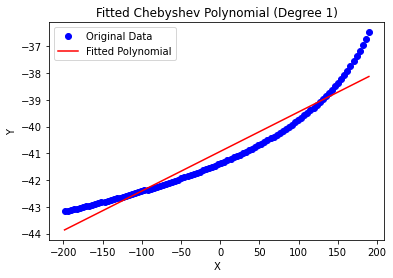

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

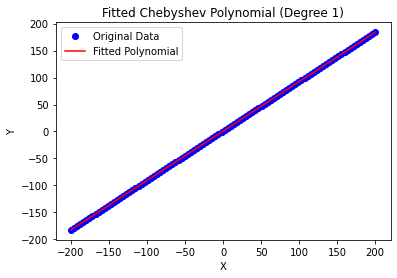

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

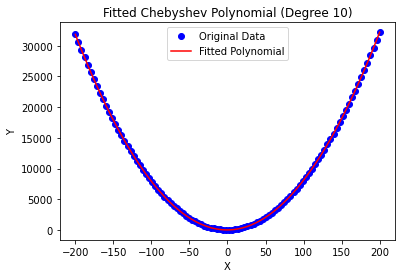

Coordinate Set:
X values: (6.577716761137339, 7.7278306310461415, 8.877944500954944, 10.028058370863748, 11.17817224077255, 12.328286110681354, 13.478399980590158, 14.62851385049896, 15.778627720407764, 16.92874159031657, 18.07885546022537, 19.228969330134174, 20.379083200042977, 21.529197069951778, 22.67931093986058, 23.829424809769385, 24.97953867967819, 26.129652549586993, 27.279766419495797, 28.429880289404597, 29.5799941593134, 30.730108029222205, 31.88022189913101, 33.03033576903981, 34.180449638948616, 35.330563508857416, 36.48067737876622, 37.630791248675024, 38.780905118583824, 39.93101898849263, 41.08113285840143, 42.23124672831024, 43.38136059821904, 44.53147446812784, 45.68158833803665, 46.83170220794545, 47.981816077854255, 49.131929947763055, 50.282043817671855, 51.43215768758066, 52.58227155748946, 53.73238542739827, 54.88249929730707, 56.03261316721587, 57.18272703712468, 58.33284090703348, 59.482954776942286, 60.633068646851086, 61.783182516759894, 62.933296386668694, 

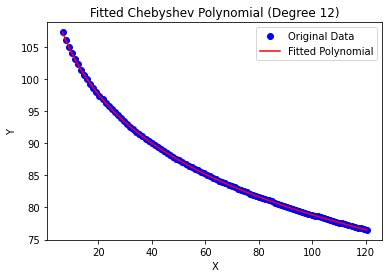

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

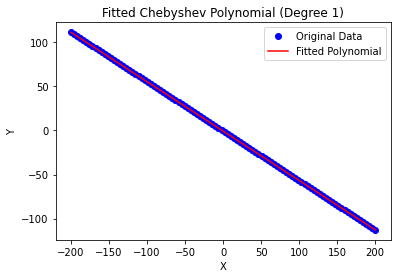

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

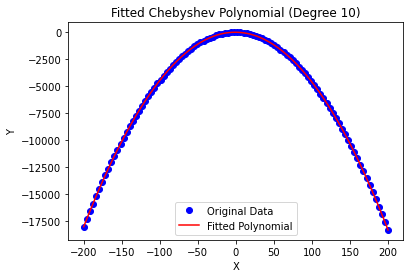

Coordinate Set:
X values: (-70.31560626472046, -69.28152280816155, -68.24743935160264, -67.21335589504373, -66.17927243848483, -65.14518898192591, -64.11110552536701, -63.0770220688081, -62.042938612249195, -61.008855155690284, -59.97477169913138, -58.94068824257247, -57.90660478601356, -56.872521329454656, -55.838437872895746, -54.804354416336835, -53.77027095977793, -52.73618750321902, -51.70210404666011, -50.66802059010121, -49.6339371335423, -48.599853676983386, -47.56577022042448, -46.53168676386557, -45.49760330730666, -44.46351985074776, -43.42943639418885, -42.39535293762994, -41.361269481071034, -40.32718602451212, -39.29310256795321, -38.25901911139431, -37.2249356548354, -36.19085219827649, -35.156768741717585, -34.122685285158674, -33.088601828599764, -32.05451837204086, -31.02043491548195, -29.98635145892304, -28.952268002364136, -27.918184545805225, -26.884101089246315, -25.85001763268741, -24.8159341761285, -23.78185071956959, -22.747767263010687, -21.713683806451776, -2

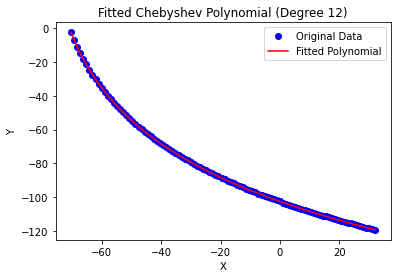

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

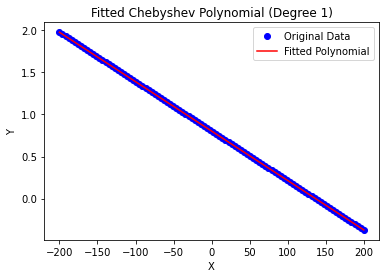

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

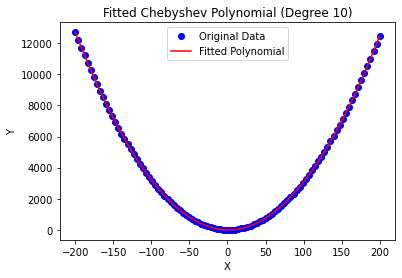

Coordinate Set:
X values: (8.010846739172933, 7.573712661512429, 7.136578583851924, 6.69944450619142, 6.262310428530915, 5.825176350870411, 5.388042273209907, 4.950908195549402, 4.513774117888897, 4.076640040228392, 3.6395059625678883, 3.2023718849073832, 2.765237807246879, 2.328103729586374, 1.8909696519258699, 1.4538355742653648, 1.0167014966048606, 0.5795674189443565, 0.14243334128385143, -0.2947007363766527, -0.7318348140371569, -1.1689688916976628, -1.606102969358167, -2.043237047018671, -2.4803711246791753, -2.9175052023396795, -3.3546392800001854, -3.7917733576606896, -4.228907435321194, -4.666041512981698, -5.103175590642204, -5.540309668302708, -5.977443745963212, -6.414577823623716, -6.8517119012842205, -7.288845978944726, -7.725980056605231, -8.163114134265737, -8.600248211926239, -9.037382289586745, -9.474516367247247, -9.911650444907753, -10.348784522568259, -10.785918600228761, -11.223052677889267, -11.66018675554977, -12.097320833210276, -12.534454910870782, -12.97158898

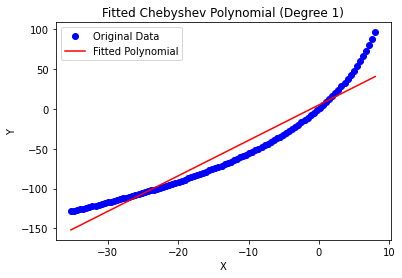

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

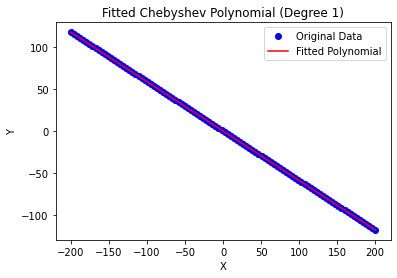

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

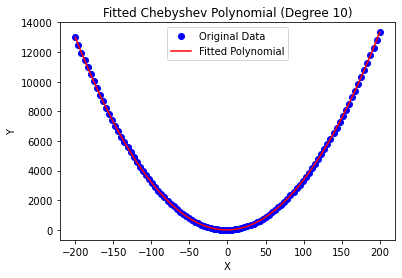

Coordinate Set:
X values: (-141.95348217965574, -139.0966561284324, -136.23983007720904, -133.38300402598566, -130.5261779747623, -127.66935192353895, -124.8125258723156, -121.95569982109225, -119.09887376986889, -116.24204771864552, -113.38522166742217, -110.52839561619882, -107.67156956497547, -104.8147435137521, -101.95791746252875, -99.10109141130539, -96.24426536008204, -93.38743930885869, -90.53061325763532, -87.67378720641197, -84.81696115518861, -81.96013510396526, -79.1033090527419, -76.24648300151854, -73.38965695029519, -70.53283089907184, -67.67600484784847, -64.81917879662512, -61.96235274540177, -59.10552669417841, -56.24870064295506, -53.39187459173169, -50.53504854050834, -47.67822248928499, -44.821396438061626, -41.964570386838275, -39.10774433561491, -36.25091828439156, -33.39409223316821, -30.537266181944844, -27.680440130721493, -24.823614079498142, -21.966788028274777, -19.109961977051427, -16.253135925828076, -13.396309874604725, -10.539483823381346, -7.6826577721

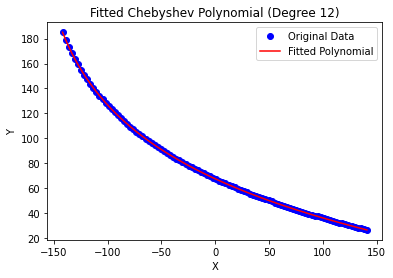

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

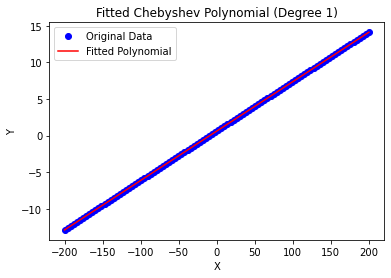

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

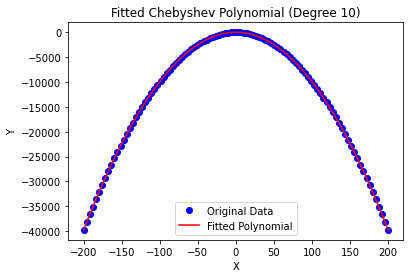

Coordinate Set:
X values: (-184.270620620255, -181.71484917631958, -179.15907773238416, -176.60330628844872, -174.0475348445133, -171.4917634005779, -168.93599195664248, -166.38022051270704, -163.82444906877163, -161.26867762483622, -158.7129061809008, -156.15713473696536, -153.60136329302995, -151.04559184909454, -148.48982040515912, -145.9340489612237, -143.37827751728827, -140.82250607335286, -138.26673462941744, -135.710963185482, -133.1551917415466, -130.59942029761118, -128.04364885367576, -125.48787740974034, -122.93210596580492, -120.3763345218695, -117.82056307793408, -115.26479163399866, -112.70902019006324, -110.15324874612782, -107.5974773021924, -105.04170585825698, -102.48593441432156, -99.93016297038615, -97.37439152645072, -94.81862008251531, -92.26284863857988, -89.70707719464447, -87.15130575070904, -84.59553430677363, -82.0397628628382, -79.48399141890279, -76.92821997496736, -74.37244853103195, -71.81667708709652, -69.26090564316111, -66.70513419922568, -64.14936275

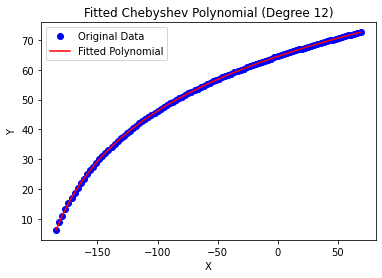

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

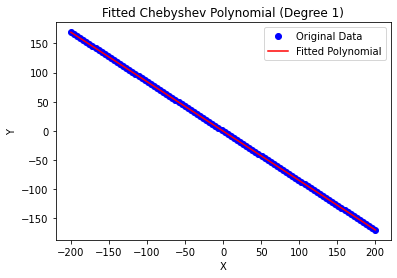

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

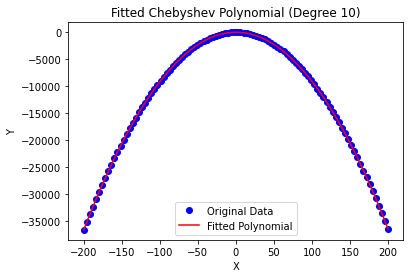

Coordinate Set:
X values: (140.0532707657605, 138.95937873725177, 137.86548670874305, 136.77159468023433, 135.6777026517256, 134.5838106232169, 133.48991859470817, 132.39602656619945, 131.30213453769073, 130.208242509182, 129.1143504806733, 128.02045845216458, 126.92656642365587, 125.83267439514715, 124.73878236663843, 123.64489033812971, 122.550998309621, 121.45710628111227, 120.36321425260357, 119.26932222409485, 118.17543019558613, 117.08153816707741, 115.98764613856869, 114.89375411005997, 113.79986208155125, 112.70597005304253, 111.61207802453382, 110.5181859960251, 109.42429396751638, 108.33040193900766, 107.23650991049894, 106.14261788199022, 105.0487258534815, 103.95483382497278, 102.86094179646406, 101.76704976795534, 100.67315773944664, 99.57926571093792, 98.4853736824292, 97.39148165392048, 96.29758962541176, 95.20369759690304, 94.10980556839434, 93.01591353988562, 91.9220215113769, 90.82812948286818, 89.73423745435946, 88.64034542585074, 87.54645339734202, 86.4525613688333,

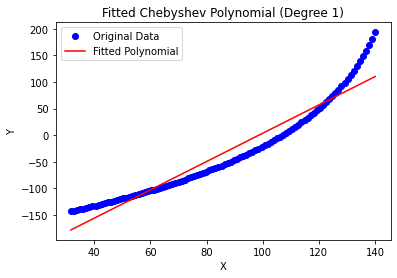

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

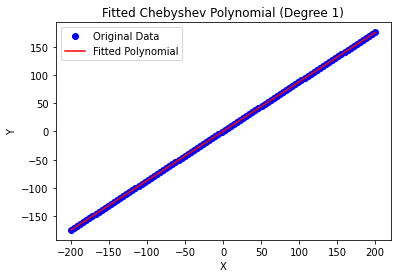

Coordinate Set:
X values: (-200.0, -195.95959595959596, -191.91919191919192, -187.87878787878788, -183.83838383838383, -179.7979797979798, -175.75757575757575, -171.7171717171717, -167.67676767676767, -163.63636363636363, -159.59595959595958, -155.55555555555554, -151.5151515151515, -147.47474747474746, -143.43434343434342, -139.39393939393938, -135.35353535353534, -131.3131313131313, -127.27272727272727, -123.23232323232322, -119.19191919191918, -115.15151515151514, -111.1111111111111, -107.07070707070706, -103.03030303030303, -98.98989898989899, -94.94949494949495, -90.9090909090909, -86.86868686868686, -82.82828282828282, -78.78787878787878, -74.74747474747474, -70.7070707070707, -66.66666666666666, -62.626262626262616, -58.585858585858574, -54.54545454545453, -50.50505050505049, -46.46464646464645, -42.42424242424241, -38.383838383838366, -34.343434343434325, -30.303030303030283, -26.26262626262624, -22.2222222222222, -18.18181818181816, -14.141414141414117, -10.101010101010075, -6

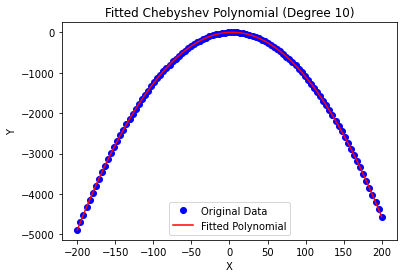

Coordinate Set:
X values: (-160.09818366776432, -156.94107120620222, -153.7839587446401, -150.626846283078, -147.4697338215159, -144.3126213599538, -141.1555088983917, -137.99839643682958, -134.8412839752675, -131.6841715137054, -128.52705905214327, -125.36994659058118, -122.21283412901907, -119.05572166745696, -115.89860920589487, -112.74149674433276, -109.58438428277066, -106.42727182120855, -103.27015935964644, -100.11304689808435, -96.95593443652224, -93.79882197496013, -90.64170951339804, -87.48459705183593, -84.32748459027383, -81.17037212871172, -78.01325966714961, -74.85614720558752, -71.69903474402541, -68.5419222824633, -65.38480982090121, -62.2276973593391, -59.070584897776996, -55.91347243621489, -52.75635997465278, -49.59924751309069, -46.44213505152858, -43.285022589966474, -40.12791012840438, -36.97079766684227, -33.813685205280166, -30.656572743718073, -27.49946028215595, -24.342347820593858, -21.185235359031765, -18.028122897469643, -14.87101043590755, -11.713897974345

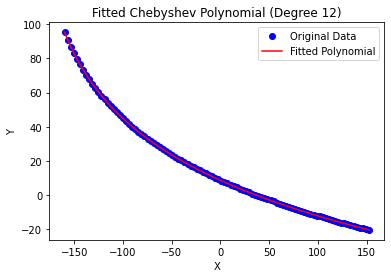

Data saved to chebyshev_data.csv


In [1]:
'''
Generate bot mouse movement coordinates
Fit a Chebyshev polynomial and evaluate for different degrees to find best degrees
write out coefficients to a csv file
'''

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Chebyshev
from sklearn.metrics import mean_squared_error
import csv
import pandas as pd


def generate_random_coefficients(degree):
    return np.random.uniform(-1, 1, degree + 1)


def evaluate_polynomial(coefficients, x):
    return np.polyval(coefficients, x)


def generate_logarithmic_path(start, end, num_points):
    t_values = np.linspace(0, 1, num_points)
    log_t_values = np.log(1 + 9 * t_values) / np.log(10)  # Map t from [0, 1] to [0, 1] using logarithmic scaling

    x_values = np.linspace(start[0], end[0], num_points)
    y_values = np.interp(log_t_values, [0, 1], [start[1], end[1]])

    return list(zip(x_values, y_values))


num_points = 100
num_sets = 60
x_range = np.linspace(-200, 200, num_points)

# List to store all the coordinate sets
all_coordinates = []

for i in range(num_sets):
    # Generate random coefficients for curves
    straight_line_coeffs = generate_random_coefficients(1)
    quadratic_coeffs = generate_random_coefficients(2)
    logarithmic_start = np.random.uniform(-200, 200, 2)
    logarithmic_end = np.random.uniform(-200, 200, 2)

    # Straight Line
    straight_line_coords = [(x, evaluate_polynomial(straight_line_coeffs, x))
                            for x in x_range]

    # Quadratic Curve
    quadratic_coords = [(x, evaluate_polynomial(quadratic_coeffs, x))
                        for x in x_range]

    # Logarithmic Path
    logarithmic_coords = generate_logarithmic_path(logarithmic_start, logarithmic_end, num_points)

    # Append all coordinates to the list
    all_coordinates.append(straight_line_coords)
    all_coordinates.append(quadratic_coords)
    all_coordinates.append(logarithmic_coords)

# Access the coordinates for a specific curve and set
print(len(all_coordinates))

# List to store all the fitted Chebyshev polynomials
all_chebyshev_fits = []
rmse_values = []  # for original coordinates
deg_range = range(1, 21)  # of the chebyshev polynomial

# List to store all the Chebyshev polynomial fits
all_chebyshev_fits = []

for coordinates in all_coordinates:
    x_values, y_values = zip(*coordinates)

    print("Coordinate Set:")
    print("X values:", x_values)
    print("Y values:", y_values)

    best_rmse = float('inf')
    best_degree = None

    # Try different degrees and calculate the RMSE for each degree
    for degree in deg_range:
        # Perform Chebyshev polynomial approximation
        chebyshev_fit = Chebyshev.fit(x_values, y_values, degree)

        # Generate x-values for evaluation
        x_eval = np.linspace(min(x_values), max(x_values), 200)

        # Evaluate the Chebyshev polynomial at the given x-values
        y_approx = chebyshev_fit(x_eval)

        # Calculate the root mean square error (RMSE)
        rmse = np.sqrt(np.mean((y_approx - np.interp(x_eval, x_values, y_values)) ** 2))

        # Update the best degree if this RMSE is smaller
        if rmse < best_rmse:
            best_rmse = rmse
            best_degree = degree

    print("Best Degree:", best_degree)

    # Perform Chebyshev polynomial approximation with the best degree
    best_chebyshev_fit = Chebyshev.fit(x_values, y_values, best_degree)
    all_chebyshev_fits.append(best_chebyshev_fit)

    # Generate x-values for evaluation
    x_eval = np.linspace(min(x_values), max(x_values), 200)

    # Evaluate the Chebyshev polynomial at the given x-values
    y_approx = best_chebyshev_fit(x_eval)

    # Plotting the original data and fitted polynomial
    plt.plot(x_values, y_values, 'bo', label='Original Data')
    plt.plot(x_eval, y_approx, 'r-', label='Fitted Polynomial')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Fitted Chebyshev Polynomial (Degree {best_degree})')
    plt.show()
    # CSV file to store the data
csv_filename = "chebyshev_data.csv"

# Open the CSV file in append mode
with open(csv_filename, mode='w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    # Write header if the file is empty
    if csvfile.tell() == 0:
        header = ['x_values', 'y_values', 'degree', 'label']
        header += [f'chebyshev_coeff_{i}' for i in range(max(deg_range) + 1)]  # Coefficient columns
        csv_writer.writerow(header)

    for coordinates, chebyshev_fit in zip(all_coordinates, all_chebyshev_fits):
        x_values, y_values = zip(*coordinates)

        # Convert Chebyshev polynomial to a standard polynomial
        polynomial_fit = chebyshev_fit.convert(kind=np.polynomial.Polynomial)

        # Get the degree of the polynomial
        degree = chebyshev_fit.degree()

        # Calculate the Chebyshev coefficients manually and reverse the order
        chebyshev_coeffs = [chebyshev_fit.coef[i] if i <= degree else 0 for i in range(degree + 1)]
        chebyshev_coeffs.reverse()

        # Write data to the CSV file
        row = [list(x_values), list(y_values), degree, 'bot']
        row += chebyshev_coeffs
        csv_writer.writerow(row)

print(f"Data saved to {csv_filename}")

# Data wrangling

In [6]:
# Read in the datasets
import pandas as pd

bot = pd.read_csv("./chebyshev_data.csv")
print(bot.columns)
human = pd.read_csv("./chebyshev_coefficients.csv")
human.columns

Index(['x_values', 'y_values', 'degree', 'label', 'chebyshev_coeff_0',
       'chebyshev_coeff_1', 'chebyshev_coeff_2', 'chebyshev_coeff_3',
       'chebyshev_coeff_4', 'chebyshev_coeff_5', 'chebyshev_coeff_6',
       'chebyshev_coeff_7', 'chebyshev_coeff_8', 'chebyshev_coeff_9',
       'chebyshev_coeff_10', 'chebyshev_coeff_11', 'chebyshev_coeff_12',
       'chebyshev_coeff_13', 'chebyshev_coeff_14', 'chebyshev_coeff_15',
       'chebyshev_coeff_16', 'chebyshev_coeff_17', 'chebyshev_coeff_18',
       'chebyshev_coeff_19', 'chebyshev_coeff_20'],
      dtype='object')


Index(['coeff_0', 'coeff_1', 'coeff_2', 'coeff_3', 'coeff_4', 'coeff_5',
       'label'],
      dtype='object')

In [7]:
# rename the columns in human dataset

new_colnames = {
    'coeff_0':'chebyshev_coeff_0', 
    'coeff_1':'chebyshev_coeff_1', 
    'coeff_2':'chebyshev_coeff_2',
    'coeff_3':'chebyshev_coeff_3', 
    'coeff_4':'chebyshev_coeff_4', 
    'coeff_5':'chebyshev_coeff_5' 
}
human_relabelled = human.rename(columns=new_colnames)

In [8]:
# Merge bot and human and fill nas with zeros(0)

merged_human_bot = bot.merge(human_relabelled,on=['chebyshev_coeff_0',
       'chebyshev_coeff_1', 'chebyshev_coeff_2', 'chebyshev_coeff_3',
       'chebyshev_coeff_4', 'chebyshev_coeff_5','label'],how= 'outer')
merged_human_bot_paddedzeros = merged_human_bot.fillna(0)

Classification Report for SVC:
              precision    recall  f1-score   support

         bot       1.00      0.05      0.10        37
       human       0.50      1.00      0.67        35

    accuracy                           0.51        72
   macro avg       0.75      0.53      0.38        72
weighted avg       0.76      0.51      0.38        72


Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

         bot       1.00      1.00      1.00        37
       human       1.00      1.00      1.00        35

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

         bot       0.58      0.19      0.29        37
       human       0.50      0.86      0.63        35

    accuracy                           0.51        72

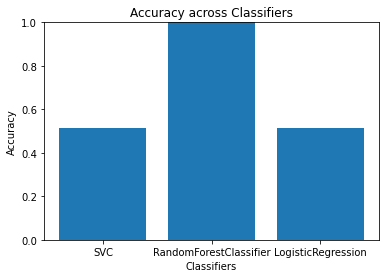

In [83]:
#train and test the model
#evaluate different classifiers

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Assuming 'label' is the column containing the target labels (0 for humans, 1 for bots)
# And 'feature_columns' is a list of columns you want to use as features for classification
feature_columns = ['chebyshev_coeff_0',
       'chebyshev_coeff_1', 'chebyshev_coeff_2', 'chebyshev_coeff_3',
       'chebyshev_coeff_4', 'chebyshev_coeff_5']#, 'chebyshev_coeff_6',
       # 'chebyshev_coeff_7', 'chebyshev_coeff_8', 'chebyshev_coeff_9',
       # 'chebyshev_coeff_10', 'chebyshev_coeff_11', 'chebyshev_coeff_12',
       # 'chebyshev_coeff_13', 'chebyshev_coeff_14', 'chebyshev_coeff_15',
       # 'chebyshev_coeff_16', 'chebyshev_coeff_17', 'chebyshev_coeff_18',
       # 'chebyshev_coeff_19', 'chebyshev_coeff_20']  # Replace with your actual feature column names
target_column = 'label'  # Replace with your actual target column name

# Split the data into features (X) and target labels (y)
X = merged_human_bot_paddedzeros[feature_columns]
y = merged_human_bot_paddedzeros[target_column]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = [
    SVC(kernel='linear', random_state=42),
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42)
]

# Lists to store classifier names, accuracies, and classification reports
classifier_names = []
accuracies = []
classification_reports = []

# Train and evaluate classifiers
for classifier in classifiers:
    classifier_name = classifier.__class__.__name__
    classifier_names.append(classifier_name)
    
    # Train the classifier on the training data
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Generate classification report
    class_rep = classification_report(y_test, y_pred)
    classification_reports.append(class_rep)

    # Print the classification report for the current classifier
    print(f"Classification Report for {classifier_name}:\n{class_rep}\n{'='*60}\n")

# Create a bar chart to visualize accuracies
plt.bar(classifier_names, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy across Classifiers')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.show()